<a href="https://colab.research.google.com/github/TraversaOlazabal/Data-Science-2---ML/blob/main/CriptoAnalytics_AlejandroTraversaOlazabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CriptoAnalytics: Exploración y Análisis de Datos del Mercado Cripto** 📱💹


## Autor: Alejandro Traversa Olazabal 👨‍💻

🔗 https://www.linkedin.com/in/alejandro-traversa-olazabal/

🔗 https://github.com/TraversaOlazabal

## 📚 **Introducción**

El presente trabajo tiene como objetivo principal realizar una exploración y análisis profundo del mercado de criptomonedas a partir de datos históricos y actuales, con el fin de identificar patrones, relaciones y comportamientos que puedan brindar indicios sobre posibles tendencias futuras.

A través del diseño de un proceso ETL (Extracción, Transformación y Carga) automatizado y la construcción de un modelo de datos estructurado, se ha logrado consolidar información proveniente de fuentes pública -la API de CoinGecko— para analizar variables clave como el precio, la capitalización de mercado, el volumen de transacciones y otros indicadores relevantes de las principales criptomonedas.

Uno de los desafíos centrales del proyecto radica en la propia naturaleza volátil e impredecible del mercado cripto, donde factores externos —tecnológicos, económicos, regulatorios o incluso sociales— pueden alterar drásticamente las tendencias. Aun así, el análisis de datos históricos permite observar ciertas regularidades o comportamientos repetitivos que, con la ayuda de herramientas analíticas y visuales, pueden orientar a los usuarios en la toma de decisiones o en la detección de oportunidades.

Además, se exploran posibles correlaciones entre criptomonedas, considerando que el comportamiento de una puede influir —total o parcialmente— en otras, o bien que presenten dinámicas similares frente a determinados eventos del mercado. Si bien se reconoce que la predicción exacta de precios es una meta altamente compleja, en este trabajo se intentará, en la medida de lo posible, diseñar un modelo predictivo que permita anticipar tendencias, comprendiendo plenamente la magnitud del desafío y apoyándose en datos limpios, ordenados y confiables.

##🎯 **Objetivo**

El objetivo de este trabajo es realizar un análisis exploratorio y predictivo del mercado de criptomonedas, utilizando un conjunto de datos que combina información histórica y actual de las principales criptos por capitalización de mercado. A través de la limpieza, transformación y visualización de variables clave como el precio, la capitalización de mercado, el volumen de operaciones y los rankings, se busca comprender la dinámica del mercado y descubrir patrones de comportamiento.

Además del análisis exploratorio, este proyecto tiene como finalidad desarrollar modelos predictivos que permitan estimar posibles movimientos futuros de precios, ya sea en función de su propio comportamiento pasado como también considerando relaciones con otras criptomonedas. Si bien se trata de un desafío complejo debido a la alta volatilidad e imprevisibilidad del mercado cripto, el trabajo intenta ofrecer insights útiles para quienes buscan entender mejor su evolución y tomar decisiones más informadas.

## 🔍 **Abstracto: Motivación y Audiencia**

El crecimiento del mercado de criptomonedas ha despertado gran interés por su potencial como vehículo de inversión, aunque su volatilidad y complejidad representan un desafío. Este análisis busca identificar patrones de comportamiento entre las principales criptomonedas, evaluando su volatilidad, correlaciones clave y reacciones ante movimientos extremos, así como contrastar hipótesis sobre su estabilidad relativa según capitalización.

La audiencia que puede beneficiarse incluye a inversores minoristas, profesionales financieros, estudiantes, entusiastas del análisis de datos y también tomadores de decisión en empresas, que consideran las criptomonedas como una alternativa de inversión dentro de sus estrategias financieras.

## **¿Comenzamos?** 👨‍💻

## **Data Acquisition**

Importamos las bibliotecas necesarias. Utilizaremos requests para conectarnos a la API pública de CoinGecko, pandas y numpy para la manipulación de datos, y las bibliotecas matplotlib y seaborn para la visualización de gráficos que nos permitirán interpretar la evolución del mercado cripto de manera más clara e intuitiva.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Luego de haber importado las librerías necesarias, el siguiente paso clave en nuestro análisis consiste en **obtener los datos más recientes de las principales criptomonedas del mercado**. Para ello, construimos una función que consulta la API pública de CoinGecko y recupera información detallada sobre las diez criptos con mayor capitalización, incluyendo su precio actual, volumen de operaciones, máximos y mínimos históricos, oferta circulante y otros atributos relevantes.

Esta función nos permitirá generar un DataFrame actualizado con los datos del día, los cuales luego serán combinados con el histórico para llevar a cabo un análisis completo y enriquecido.

A continuación, definimos la función obtener_datos_actuales() que realiza esta tarea:

In [2]:
def obtener_datos_actuales():
    coin_ids = [
        "bitcoin", "ethereum", "polkadot", "ripple", "binancecoin",
        "solana", "litecoin", "dogecoin", "cardano", "tron"
    ]

    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "ids": ",".join(coin_ids),
        "sparkline": False
    }

    response = requests.get(url, params=params)
    data = response.json()

    columnas_utiles = [
                        'id', 'symbol', 'name', 'current_price', 'market_cap', 'market_cap_rank',
                        'circulating_supply', 'fully_diluted_valuation',
                        'total_volume',
                        'ath', 'ath_date',
                        'atl', 'atl_date',
                        'image', 'last_updated', 'max_supply'
    ]

    df = pd.DataFrame(data)[columnas_utiles]

    # Asegurarse que last_updated sea datetime
    df["last_updated"] = pd.to_datetime(df["last_updated"], utc=True)

    # Crear columna de solo fecha
    df["date"] = df["last_updated"].dt.date

    return df

Una vez definida la función que nos permite conectarnos con la API de CoinGecko y estructurar los datos obtenidos en un formato tabular, procedemos a su ejecución. En esta etapa inicial, nuestro objetivo es capturar una instantánea actualizada del mercado de criptomonedas, limitada a las diez más relevantes por capitalización de mercado.

Esta primera extracción nos brindará una base de datos con la que podremos comenzar el análisis exploratorio, y servirá además como punto de partida para construir un histórico a lo largo del tiempo.

Ejecutamos entonces la función obtener_datos_actuales() y almacenamos el resultado en un DataFrame llamado df_cryptos:

In [3]:
df_cryptos = obtener_datos_actuales()

Para verificar que la extracción se haya realizado correctamente y observar la estructura de los datos obtenidos, visualizamos las primeras filas del DataFrame. Esto nos permite validar que cada columna contenga la información esperada y que no haya errores evidentes en la consulta a la API.

A continuación, mostramos las primeras cinco filas de df_cryptos:

In [4]:
df_cryptos.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,circulating_supply,fully_diluted_valuation,total_volume,ath,ath_date,atl,atl_date,image,last_updated,max_supply,date
0,bitcoin,btc,Bitcoin,106085.00,2108226401181,1,1.988292e+07,2108227991662,41970117301,111814.00,2025-05-22T18:41:28.492Z,67.810000,2013-07-06T00:00:00.000Z,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:21.909000+00:00,2.100000e+07,2025-06-24
1,ethereum,eth,Ethereum,2458.79,296314253001,2,1.207193e+08,296314253001,26363595781,4878.26,2021-11-10T14:24:19.604Z,0.432979,2015-10-20T00:00:00.000Z,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:24.071000+00:00,NaN,2025-06-24
2,ripple,xrp,XRP,2.20,129302124997,4,5.893865e+10,219353573000,4143421493,3.40,2018-01-07T00:00:00.000Z,0.002686,2014-05-22T00:00:00.000Z,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:17.511000+00:00,1.000000e+11,2025-06-24
3,binancecoin,bnb,BNB,642.67,93696452446,5,1.458876e+08,93696452446,870430560,788.84,2024-12-04T10:35:25.220Z,0.039818,2017-10-19T00:00:00.000Z,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:21.467000+00:00,2.000000e+08,2025-06-24
4,solana,sol,Solana,145.01,76854419435,6,5.312079e+08,87346094171,6248220473,293.31,2025-01-19T11:15:27.957Z,0.500801,2020-05-11T19:35:23.449Z,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:17.735000+00:00,NaN,2025-06-24


Luego de visualizar una muestra inicial de los datos, es fundamental conocer la estructura completa del DataFrame. Para ello, utilizamos el método .info(), que nos permite identificar el tipo de dato de cada columna, la cantidad de valores no nulos y otras características relevantes.

Esta revisión es especialmente útil para detectar posibles valores faltantes o inconsistencias antes de avanzar con el análisis más profundo.

A continuación, inspeccionamos la información general de df_cryptos:

In [5]:
df_cryptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       10 non-null     object             
 1   symbol                   10 non-null     object             
 2   name                     10 non-null     object             
 3   current_price            10 non-null     float64            
 4   market_cap               10 non-null     int64              
 5   market_cap_rank          10 non-null     int64              
 6   circulating_supply       10 non-null     float64            
 7   fully_diluted_valuation  10 non-null     int64              
 8   total_volume             10 non-null     int64              
 9   ath                      10 non-null     float64            
 10  ath_date                 10 non-null     object             
 11  atl                      10 non-nul

Con los datos ya verificados y estructurados correctamente, procedemos a guardar una copia local del DataFrame en formato CSV. Esto nos permite preservar la información obtenida en esta instancia, facilitando su reutilización en futuros análisis sin necesidad de volver a consultar la API.

Además, contar con un respaldo local es útil para trabajar de forma más eficiente y evitar depender exclusivamente de la conexión en tiempo real.

Guardamos entonces los datos actuales en un archivo llamado datos_cryptos.csv:

In [6]:
df_cryptos.to_csv("datos_cryptos.csv", index=False)

Una vez generado el archivo CSV con los datos actuales, lo descargamos a nuestro equipo para conservar una copia local.

Ejecutamos la siguiente instrucción para iniciar la descarga:

In [ ]:
from google.colab import files
files.download("datos_cryptos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dado que nuestro dataset contiene únicamente las diez criptomonedas más relevantes por capitalización, resulta útil mostrarlas de forma visual y completa. Para ello, definimos una función que recorre todo el DataFrame y presenta cada activo junto a su ícono, nombre, símbolo y precio actual.

Esta visualización nos permite obtener una primera impresión clara y ordenada del universo de criptomonedas que estaremos analizando.

Ejecutamos a continuación la función mostrar_con_icono_todas():

In [7]:
from IPython.display import HTML

def mostrar_con_icono_todas(df):
    html = ""
    for _, fila in df.iterrows():
        html += f"""
        <div style="display:flex; align-items:center; margin-bottom:10px;">
            <img src="{fila['image']}" style="width:25px; height:25px; margin-right:10px;">
            <span>{fila['name']} ({fila['symbol'].upper()}) - ${fila['current_price']}</span>
        </div>
        """
    return HTML(html)

# Mostramos todas las criptomonedas
mostrar_con_icono_todas(df_cryptos)

Para complementar los datos actuales con información histórica, definimos una función que consulta la API de CoinGecko para obtener el histórico diario de precio, capitalización de mercado y volumen total de las criptomonedas específicas de nuestro trabajo durante un período determinado (por defecto, los últimos 365 días).

Esta función procesa la respuesta JSON, convierte los timestamps a fechas legibles y filtra los datos para evitar incluir información incompleta del día en curso. Además, agrupa los datos por fecha, tomando el último registro del día como valor representativo, simulando un cierre diario.

Así, podremos construir un dataset histórico sólido y confiable que luego combinaremos con los datos actuales para realizar análisis más completos y profundos.

A continuación, presentamos la implementación de la función get_coin_history():

In [8]:
import requests
import pandas as pd
from datetime import datetime

def get_coin_history(coin_id, days=365):  # Cambiado default a 365
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": days,
        "interval": "daily"
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()

        prices = data.get("prices", [])
        market_caps = data.get("market_caps", [])
        total_volumes = data.get("total_volumes", [])

        # Construimos el DataFrame base con timestamp y precio
        df = pd.DataFrame({
            "timestamp": [x[0] for x in prices],
            "price": [x[1] for x in prices],
            "market_cap": [x[1] for x in market_caps] if market_caps else [None] * len(prices),
            "total_volume": [x[1] for x in total_volumes] if total_volumes else [None] * len(prices)
        })

        # Convertimos timestamp a fecha
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms", utc=True)
        df["date"] = df["timestamp"].dt.date

        # Filtramos para no incluir el día actual
        fecha_actual = datetime.utcnow().date()
        df = df[df["date"] < fecha_actual]

        # Agrupamos por fecha y tomamos el último registro por día (simulando cierre)
        df = df.groupby("date").agg({
            "price": "last",
            "market_cap": "last",
            "total_volume": "last"
        }).reset_index()

        # Agregamos la columna 'id'
        df["id"] = coin_id

        return df

    except Exception as e:
        print(f"❌ Error al obtener datos para {coin_id}: {e}")
        return None

Con la función definida, procedemos a obtener el histórico diario de los últimos 365 días para cada una de las diez criptomonedas principales seleccionadas. Esto nos permitirá contar con series temporales completas para analizar su evolución en precio, volumen y capitalización de mercado.

A continuación, ejecutamos la extracción de datos para cada moneda, comenzando con Bitcoin y siguiendo con las demás criptomonedas de interés:

In [9]:
# Bitcoin
df_btc = get_coin_history("bitcoin", days=365)

In [10]:
# Ethereum
df_eth = get_coin_history("ethereum", days=365)

In [11]:
# Polka Dot
df_dot = get_coin_history("polkadot", days=365)

In [12]:
# Ripple
df_xrp = get_coin_history("ripple", days=365)

⚠️ Nota importante sobre la API de CoinGecko:

Al ejecutar múltiples consultas a la API en un corto período de tiempo (especialmente al extraer datos históricos de varias criptomonedas consecutivamente), es posible que aparezcan errores intermitentes —generalmente a partir de la quinta o sexta criptomoneda— debido a las restricciones de velocidad impuestas por la propia API.

En esos casos, la función get_coin_history() puede lanzar un error de tipo 429 Too Many Requests o simplemente fallar la descarga de datos para una moneda en particular.

¿Cómo solucionarlo?
La solución es simple: esperar unos segundos o minutos y luego volver a ejecutar el bloque de código correspondiente (por ejemplo, el de binancecoin). La API suele restablecer el límite rápidamente y permite continuar con las consultas sin problemas.

In [13]:
# Binance Coin
df_bnb = get_coin_history("binancecoin", days=365)

In [14]:
# Solana
df_sol = get_coin_history("solana", days=365)

In [15]:
# Lite Coin
df_lite = get_coin_history("litecoin", days=365)

In [16]:
# Dogecoin
df_doge = get_coin_history("dogecoin", days=365)

In [17]:
# Cardano
df_ada = get_coin_history("cardano", days=365)

In [20]:
# Tron
df_tron = get_coin_history("tron", days=365)

Una vez obtenidos los datos históricos individuales para cada criptomoneda, el siguiente paso es consolidarlos en un único DataFrame.

A continuación, mostramos cómo concatenamos los DataFrames y verificamos el tamaño final del conjunto de datos:

In [21]:
# Concatenar todo lo histórico
df_historical = pd.concat([
    df_btc, df_eth, df_dot, df_xrp, df_bnb,
    df_sol, df_lite, df_tron, df_doge, df_ada
], ignore_index=True)

# Verificar
df_historical.shape

(3640, 5)

Para tener una vista rápida y confirmar que la unión de los datos fue exitosa, visualizamos las primeras filas del DataFrame resultante:

In [22]:
df_historical.head()

,date,price,market_cap,total_volume,id
0,2024-06-25,60363.234975,1.188965e+12,4.203655e+10,bitcoin
1,2024-06-26,61770.413870,1.217935e+12,2.110556e+10,bitcoin
2,2024-06-27,60749.896194,1.198205e+12,2.290854e+10,bitcoin
3,2024-06-28,61562.645326,1.213932e+12,1.885514e+10,bitcoin
4,2024-06-29,60317.096979,1.189570e+12,2.439942e+10,bitcoin



Para comprender mejor la estructura del conjunto de datos histórico, revisamos un resumen con la información de cada columna, incluyendo tipos de datos y la cantidad de registros no nulos. Esto nos ayuda a detectar posibles valores faltantes y a confirmar que los datos fueron correctamente cargados:

In [23]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3640 non-null   object 
 1   price         3640 non-null   float64
 2   market_cap    3640 non-null   float64
 3   total_volume  3640 non-null   float64
 4   id            3640 non-null   object 
dtypes: float64(3), object(2)
memory usage: 142.3+ KB


Como parte del proceso de preservación y para facilitar su uso posterior, exportamos el DataFrame histórico consolidado a un archivo CSV:

In [24]:
df_historical.to_csv("datos_historicos_10cryptos.csv", index=False)

In [ ]:
from google.colab import files
files.download("datos_historicos_10cryptos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Data Wrangling**

Mediante un merge basado en el identificador de la criptomoneda y la fecha, logramos integrar ambos conjuntos en un único DataFrame, manteniendo toda la información relevante de cada fuente.

Esta fusión con método outer garantiza que no se pierdan registros.

A continuación, verificamos la dimensión del DataFrame resultante para asegurarnos de que la unión fue exitosa:

In [25]:
# Merge entre actuales e históricos
df_merged = pd.merge(
    df_historical,
    df_cryptos,
    on=["id", "date"],
    how="outer",
    suffixes=("_hist", "_actual")
)

# Verificamos
df_merged.shape

(3650, 20)

Antes de continuar con el análisis, es fundamental asegurarnos de que no existan registros duplicados en el dataset final:

In [26]:
duplicados = df_merged.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de filas duplicadas: 0


EXCELENTE 🌟 No existen registros duplicados. Ya tenemos nuestro dataframe con el que vamos a comenzar a trabajar.

Antes que nada vamos revisar cómo quedó la combinación de datos históricos y actuales. Mostramos las últimas filas del DataFrame resultante:

In [27]:
df_merged.tail()

,date,price,market_cap_hist,total_volume_hist,id,symbol,name,current_price,market_cap_actual,market_cap_rank,circulating_supply,fully_diluted_valuation,total_volume_actual,ath,ath_date,atl,atl_date,image,last_updated,max_supply
3645,2025-06-20,0.274685,2.604650e+10,4.554561e+08,tron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3646,2025-06-21,0.272483,2.583851e+10,6.332046e+08,tron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3647,2025-06-22,0.270289,2.559801e+10,4.984358e+08,tron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3648,2025-06-23,0.263612,2.500968e+10,1.367579e+09,tron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3649,2025-06-24,NaN,NaN,NaN,tron,trx,TRON,0.274237,2.599984e+10,8.0,9.481156e+10,2.599984e+10,714262873.0,0.431288,2024-12-04T00:10:40.323Z,0.001804,2017-11-12T00:00:00.000Z,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:18.225000+00:00,NaN


## **Continuemos:**

Como puede observarse, una vez realizada la unión de los datasets históricos y actuales, obtenemos un DataFrame con información consolidada para cada una de las criptomonedas analizadas. Sin embargo, **esta fusión genera algunos desafíos que requieren una etapa de depuración y transformación para preparar los datos correctamente antes del análisis.**

En primer lugar, es común encontrar valores nulos en varias columnas, especialmente en los registros más recientes donde aún no se disponen de datos históricos consolidados o cuando los datos actuales no estaban disponibles al momento de la consulta. Para abordar esto, se completarán los valores faltantes de variables clave como price, market_cap_hist y total_volume_hist con sus respectivos equivalentes actuales (current_price, market_cap_actual, total_volume_actual) cuando estén disponibles.

Además, se reorganizarán las columnas para mejorar la legibilidad del DataFrame y facilitar futuros análisis, estableciendo un orden lógico que agrupe variables similares. También se procederá a renombrar algunas columnas para dar mayor claridad semántica (por ejemplo, price pasará a llamarse closing_price, y total_volume_hist a total_volume_day), y se ajustarán tipos de datos si es necesario para garantizar consistencia en el tratamiento posterior.

Finalmente, se eliminarán o transformarán aquellas columnas redundantes o no necesarias para los objetivos del proyecto. Este paso es esencial para reducir el ruido en los datos y asegurar una base sólida para la generación de visualizaciones y métricas.

In [28]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   date                     3650 non-null   object             
 1   price                    3640 non-null   float64            
 2   market_cap_hist          3640 non-null   float64            
 3   total_volume_hist        3640 non-null   float64            
 4   id                       3650 non-null   object             
 5   symbol                   10 non-null     object             
 6   name                     10 non-null     object             
 7   current_price            10 non-null     float64            
 8   market_cap_actual        10 non-null     float64            
 9   market_cap_rank          10 non-null     float64            
 10  circulating_supply       10 non-null     float64            
 11  fully_diluted_valuation  10 no

Para facilitar la lectura y el análisis posterior, reordenamos las columnas del DataFrame final según un esquema lógico y conveniente. Esto permite que los datos más relevantes y comparables estén agrupados y se puedan interpretar más fácilmente.

Definimos una lista con el orden deseado de las columnas y aplicamos esta ordenación al DataFrame unificado:

In [29]:
# Lista con el orden deseado de las columnas,
orden_columnas = ['id', 'symbol', 'name', 'date', 'price', 'circulating_supply', 'market_cap_hist', 'market_cap_rank', 'total_volume_hist', 'max_supply', 'fully_diluted_valuation', 'ath', 'ath_date', 'atl', 'atl_date', 'image', 'last_updated', 'market_cap_actual', 'current_price', 'total_volume_actual']

# Reordenar el DataFrame
df_merged = df_merged[orden_columnas]

Como parte del proceso de limpieza y estandarización del dataset unificado, se procede a completar valores faltantes en las variables históricas clave utilizando, cuando están disponibles, los datos más recientes obtenidos en la extracción actual. Este paso resulta fundamental para asegurar que no se pierda información valiosa por la presencia de nulos tras el merge:

In [30]:
df_merged.loc[df_merged['market_cap_actual'].notna(), 'market_cap_hist'] = df_merged['market_cap_actual']
df_merged.loc[df_merged['current_price'].notna(), 'price'] = df_merged['current_price']
df_merged.loc[df_merged['total_volume_actual'].notna(), 'total_volume_hist'] = df_merged['total_volume_actual']

Con el objetivo de mejorar la claridad semántica del dataset y facilitar su interpretación en etapas posteriores del análisis, se procede a renombrar algunas columnas clave:

In [31]:
df_merged.rename(columns={
    'market_cap_hist': 'market_cap',
    'total_volume_hist': 'total_volume_day',
    'price': 'closing_price'
}, inplace=True)

Una vez renombradas las columnas, se procede a completar los valores faltantes en aquellas variables que presentan datos constantes a lo largo del tiempo para cada criptomoneda. Muchas de estas columnas, como el nombre del activo, su símbolo o su imagen, son atributos estáticos o que cambian con muy poca frecuencia, y su ausencia en algunos registros suele deberse a la forma en que se realiza la fusión entre datos históricos y actuales:

In [32]:
df_merged['circulating_supply'] = df_merged.groupby('id')['circulating_supply'].transform(lambda x: x.ffill().bfill())
df_merged['market_cap_rank'] = df_merged.groupby('id')['market_cap_rank'].transform(lambda x: x.ffill().bfill())
df_merged['max_supply'] = df_merged.groupby('id')['max_supply'].transform(lambda x: x.ffill().bfill())
df_merged['fully_diluted_valuation'] = df_merged.groupby('id')['fully_diluted_valuation'].transform(lambda x: x.ffill().bfill())
df_merged['ath'] = df_merged.groupby('id')['ath'].transform(lambda x: x.ffill().bfill())
df_merged['ath_date'] = df_merged.groupby('id')['ath_date'].transform(lambda x: x.ffill().bfill())
df_merged['atl'] = df_merged.groupby('id')['atl'].transform(lambda x: x.ffill().bfill())
df_merged['atl_date'] = df_merged.groupby('id')['atl_date'].transform(lambda x: x.ffill().bfill())
df_merged['image'] = df_merged.groupby('id')['image'].transform(lambda x: x.ffill().bfill())
df_merged['symbol'] = df_merged.groupby('id')['symbol'].transform(lambda x: x.ffill().bfill())
df_merged['name'] = df_merged.groupby('id')['name'].transform(lambda x: x.ffill().bfill())

Una vez que los valores actuales de capitalización de mercado, precio y volumen diario han sido utilizados para completar o actualizar los datos históricos correspondientes, estas columnas originales pierden relevancia en el análisis y pueden eliminarse del DataFrame:

In [33]:
df_merged.drop(columns=['market_cap_actual', 'current_price', 'total_volume_actual'], inplace=True)

Con el conjunto de datos ya unificado y depurado, se lleva a cabo una **última etapa de transformación y ajuste en el formato de los valores** para asegurar una correcta visualización, interpretación y posterior análisis:

**Redondeo de precios:** Se redondean a dos decimales los valores de price, ath (precio máximo histórico) y atl (precio mínimo histórico) para mejorar la presentación de los datos monetarios y facilitar su lectura.

**Conversión de grandes volúmenes numéricos:** Para evitar la notación científica y asegurar una visualización clara de valores como la capitalización de mercado, volumen de operaciones, o el suministro circulante, se convierte el tipo de dato de columnas específicas a float64.

**Formato entero para el ranking:** La columna market_cap_rank se completa con ceros en caso de valores nulos y se transforma a tipo entero, ya que representa una posición en el ranking y no admite decimales.

**Formato de fechas:** Las fechas correspondientes a los valores máximos y mínimos históricos (ath_date y atl_date) se convierten al formato de fecha sin incluir la hora, ya que el nivel de precisión horaria no es relevante para el análisis.

In [34]:
# 1. Redondear a 2 decimales
df_merged['closing_price'] = df_merged['closing_price'].round(2)
df_merged['ath'] = df_merged['ath'].round(2)
df_merged['atl'] = df_merged['atl'].round(2)

# 2. Convertir números grandes a float sin notación científica
pd.options.display.float_format = '{:,.2f}'.format  # afecta la visualización general
# Si querés evitar el cambio global y solo modificar columnas específicas:
cols_grandes = ['circulating_supply', 'market_cap', 'total_volume_day', 'max_supply', 'fully_diluted_valuation']
for col in cols_grandes:
    df_merged[col] = df_merged[col].astype('float64')  # asegura el tipo y saca notación científica

# 3. Convertir market_cap_rank a entero sin coma
df_merged['market_cap_rank'] = df_merged['market_cap_rank'].fillna(0).astype(int)

Para asegurar un correcto manejo y análisis temporal de los datos, es fundamental que las columnas que contienen fechas estén en un formato de fecha reconocido por Pandas:

In [35]:
# Convertir columnas a formato fecha
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")

Una vez aplicadas todas las transformaciones, se procede a realizar una última inspección visual de los datos para corroborar que las modificaciones hayan sido exitosas:

In [36]:
df_merged.tail()

,id,symbol,name,date,closing_price,circulating_supply,market_cap,market_cap_rank,total_volume_day,max_supply,fully_diluted_valuation,ath,ath_date,atl,atl_date,image,last_updated
3645,tron,trx,TRON,2025-06-20,0.27,"94,811,560,962.40","26,046,504,803.77",8,"455,456,091.75",NaN,"25,999,840,798.00",0.43,2024-12-04 00:10:40.323000+00:00,0.00,2017-11-12 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
3646,tron,trx,TRON,2025-06-21,0.27,"94,811,560,962.40","25,838,509,317.93",8,"633,204,572.68",NaN,"25,999,840,798.00",0.43,2024-12-04 00:10:40.323000+00:00,0.00,2017-11-12 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
3647,tron,trx,TRON,2025-06-22,0.27,"94,811,560,962.40","25,598,012,133.52",8,"498,435,799.20",NaN,"25,999,840,798.00",0.43,2024-12-04 00:10:40.323000+00:00,0.00,2017-11-12 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
3648,tron,trx,TRON,2025-06-23,0.26,"94,811,560,962.40","25,009,684,733.45",8,"1,367,578,859.09",NaN,"25,999,840,798.00",0.43,2024-12-04 00:10:40.323000+00:00,0.00,2017-11-12 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
3649,tron,trx,TRON,2025-06-24,0.27,"94,811,560,962.40","25,999,842,043.00",8,"714,262,873.00",NaN,"25,999,840,798.00",0.43,2024-12-04 00:10:40.323000+00:00,0.00,2017-11-12 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:18.225000+00:00


Al observar el resultado, se aprecia que el **conjunto de datos luce ahora mucho más limpio y estructurado**. Se han completado los valores nulos relevantes, los nombres de columnas están estandarizados, y los tipos de datos han sido corregidos para facilitar su lectura y análisis. Además, la información histórica y actual de cada criptomoneda se encuentra integrada y ordenada cronológicamente, lo que permitirá trabajar con este dataset de manera efectiva en las siguientes etapas del proyecto.

### Es momento de conocer en detalle nuestro dataset:

📊 Luego de realizar la unión, limpieza, actualización y reorganización de los datos, obtenemos un dataset final con columnas que resumen de forma clara y estructurada las principales características de cada criptomoneda a lo largo del tiempo. A continuación, se detalla brevemente el significado de cada una:

**id**: identificador único de la criptomoneda en la API de CoinGecko.

**symbol**: símbolo o abreviatura con la que se representa la criptomoneda (por ejemplo, BTC para Bitcoin).

**name**: nombre completo de la criptomoneda.

**date**: fecha correspondiente a cada registro (formato diario).

**closing_price**: precio de cierre diario de la criptomoneda en dólares.

**circulating_supply**: cantidad de monedas en circulación para esa fecha.

**market_cap**: capitalización de mercado, calculada como precio × circulante.

**market_cap_rank**: posición que ocupa la criptomoneda según su capitalización en el mercado global.

**total_volume_day**: volumen total operado durante el día (cantidad transada en USD).

**max_supply**: cantidad máxima de monedas que pueden llegar a existir (si está definida).

**fully_diluted_valuation**: valoración total si se emitiera la cantidad máxima de monedas.

**ath**: precio máximo histórico alcanzado (All Time High).

**ath_date**: fecha en la que se alcanzó el precio máximo histórico.

**atl**: precio mínimo histórico alcanzado (All Time Low).

**atl_date**: fecha en la que se alcanzó el precio mínimo histórico.

**image**: enlace a un ícono representativo de la criptomoneda.

**last_updated**: fecha y hora de la última actualización disponible desde la API.


In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   closing_price            3650 non-null   float64            
 5   circulating_supply       3650 non-null   float64            
 6   market_cap               3650 non-null   float64            
 7   market_cap_rank          3650 non-null   int64              
 8   total_volume_day         3650 non-null   float64            
 9   max_supply               1825 non-null   float64            
 10  fully_diluted_valuation  3650 non-null   float64            
 11  ath                      3650 

Al analizar la estructura de nuestro DataFrame, observamos que contiene 3,650 registros distribuidos en 17 columnas. La mayoría de las columnas no presentan valores nulos, lo que indica que la depuración y el llenado de datos faltantes se realizó con éxito en gran medida. Destaca la columna max_supply, que posee aproximadamente la mitad de valores nulos, dado que no todas las criptomonedas tienen un límite máximo definido en su emisión.

En cuanto a los tipos de datos, contamos con columnas de tipo fecha (datetime64), que permiten trabajar con series temporales de manera eficiente, y varias columnas numéricas (float64 e int64) para representar valores financieros y cantidades. También tenemos columnas de texto (object), que identifican a cada criptomoneda y contienen URLs para imágenes.

Es importante destacar que la columna last_updated, aunque posee pocos datos no nulos, cumple una función clave: indica cuál es el registro que corresponde al valor más reciente obtenido, permitiendo conocer el día y la hora exacta en que se realizó la consulta a la API para esa criptomoneda.

Esta estructura sólida nos permitirá continuar con confianza en el análisis y la visualización de los datos.

Finalmente, para conservar el conjunto de datos completo y unificado, exportamos el DataFrame fusionado a un archivo CSV. Este archivo servirá como base para futuros análisis, visualizaciones o modelados, evitando tener que repetir las consultas y procesos previos.

Guardamos este archivo con el nombre dataset_final_unido.csv:

In [38]:
df_merged.to_csv("dataset_final_unido.csv", index=False)

In [ ]:
from google.colab import files
files.download("dataset_final_unido.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🚨**Advertencia para lector con dificultades en la preparación del DataFrame** 🚨

Si has podido completar correctamente todas las etapas previas de extracción, depuración y combinación de datos, y cuentas con el DataFrame final (df_merged o el nombre que hayas asignado) listo para continuar, **no es necesario ejecutar el siguiente bloque de código**, ya que podrías sobrescribir tu trabajo y generar errores en las etapas posteriores.

Sin embargo, si por algún motivo encontraste dificultades, errores o no pudiste obtener el DataFrame correctamente, como alternativa rápida y práctica, puedes cargar directamente un archivo CSV preprocesado y disponible en GitHub. Esto te permitirá continuar con las fases de análisis y exploración de datos sin inconvenientes.

In [ ]:
# Si quiero obtener datos directamente de un csv con algunos datos previamente reunidos: esta luego la paso al final como plan B! por si no pueden traer datos desde la API
# Enlace raw del CSV en GitHub
url_github_csv = 'https://raw.githubusercontent.com/TraversaOlazabal/Data-Science-2---ML/refs/heads/main/data/dataset_final_unido_auxiliar.csv'

df_merged = pd.read_csv(url_github_csv, parse_dates=['last_updated'])
print("📥 Dataset cargado exitosamente desde GitHub.")

# Convertir columnas a formato fecha
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")

📥 Dataset cargado exitosamente desde GitHub.


## **Continuamos:**

### 🧩 **Generación de variables derivadas y temporales**

Con el objetivo de enriquecer el análisis exploratorio y preparar el dataset para posibles aplicaciones futuras de Machine Learning, en esta sección vamos a crear nuevas variables a partir de las columnas existentes.

Por un lado, generaremos **variables derivadas**, que permiten capturar dinámicas relevantes del comportamiento de cada criptomoneda a lo largo del tiempo, como variaciones porcentuales, promedios móviles, volatilidad o ratios de relación entre volumen y capitalización.

Por otro lado, incorporaremos **variables temporales**, que nos permitirán explorar patrones según el momento del año, el mes o el día de la semana, y evaluar si existen comportamientos distintos en días hábiles y fines de semana.

Estas nuevas columnas no sólo aportan valor al análisis exploratorio, sino que también amplían el conjunto de atributos que podrían resultar útiles como variables predictoras en modelos de aprendizaje automático.

📌 Variables derivadas (cálculos sobre columnas existentes):

Variación porcentual diaria del precio (daily_pct_change):

In [39]:
df_merged["daily_pct_change"] = df_merged.groupby("id")["closing_price"].pct_change()

Promedios móviles (por ejemplo, 7 y 30 días):

In [40]:
df_merged["sma_7"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(7).mean())
df_merged["sma_30"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(30).mean())

Volatilidad (rolling std):

In [41]:
df_merged["volatility_7d"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(7).std())

Ratio de market cap sobre volumen diario:

In [42]:
df_merged["volume_marketcap_ratio"] = df_merged["total_volume_day"] / df_merged["market_cap"]

Proporción de oferta circulante respecto al total (si la cripto posee max_supply):

In [43]:
df_merged["circulation_ratio"] = df_merged["circulating_supply"] / df_merged["max_supply"]

📅 Variables temporales:

Año, mes, día de la semana:

In [44]:
df_merged["year"] = df_merged["date"].dt.year
df_merged["month"] = df_merged["date"].dt.month
df_merged["weekday"] = df_merged["date"].dt.day_name()

¿Es fin de semana? (útil para detectar patrones diferentes en días hábiles y no hábiles):

In [45]:
df_merged["is_weekend"] = df_merged["date"].dt.weekday >= 5

Perfecto, ahora ordenemos nuestras nuevas columnas:



In [46]:
column_order = [
    "id", "symbol", "name",
    "date", "year", "month", "weekday", "is_weekend",
    "closing_price", "daily_pct_change", "sma_7", "sma_30", "volatility_7d", "total_volume_day", "volume_marketcap_ratio",
    "market_cap", "market_cap_rank", "fully_diluted_valuation", "circulating_supply", "max_supply", "circulation_ratio",
    "ath", "ath_date", "atl", "atl_date",
    "image", "last_updated"
]

# Aplicar el nuevo orden
df_merged = df_merged[column_order]

## 🧾 **Visualización del DataFrame final**

A continuación, se muestra una vista preliminar del DataFrame final luego del proceso completo de limpieza, transformación y enriquecimiento de datos:

In [47]:
pd.set_option('display.max_columns', None)
df_merged.head(50)

,id,symbol,name,date,year,month,weekday,is_weekend,closing_price,daily_pct_change,sma_7,sma_30,volatility_7d,total_volume_day,volume_marketcap_ratio,market_cap,market_cap_rank,fully_diluted_valuation,circulating_supply,max_supply,circulation_ratio,ath,ath_date,atl,atl_date,image,last_updated
0,binancecoin,bnb,BNB,2024-06-25,2024,6,Tuesday,False,568.29,NaN,NaN,NaN,NaN,"1,423,801,612.33",0.02,"87,271,749,669.35",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
1,binancecoin,bnb,BNB,2024-06-26,2024,6,Wednesday,False,578.10,0.02,NaN,NaN,NaN,"822,683,284.71",0.01,"88,851,602,668.01",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
2,binancecoin,bnb,BNB,2024-06-27,2024,6,Thursday,False,571.97,-0.01,NaN,NaN,NaN,"706,189,025.81",0.01,"87,994,251,271.49",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
3,binancecoin,bnb,BNB,2024-06-28,2024,6,Friday,False,580.48,0.01,NaN,NaN,NaN,"821,012,226.75",0.01,"89,308,267,430.45",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
4,binancecoin,bnb,BNB,2024-06-29,2024,6,Saturday,True,566.78,-0.02,NaN,NaN,NaN,"723,489,522.54",0.01,"87,198,053,054.71",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
5,binancecoin,bnb,BNB,2024-06-30,2024,6,Sunday,True,569.04,0.00,NaN,NaN,NaN,"405,914,726.51",0.00,"87,526,072,993.10",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
6,binancecoin,bnb,BNB,2024-07-01,2024,7,Monday,False,581.78,0.02,573.78,NaN,6.22,"679,465,520.41",0.01,"89,479,656,642.30",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
7,binancecoin,bnb,BNB,2024-07-02,2024,7,Tuesday,False,576.46,-0.01,574.94,NaN,5.77,"664,117,687.15",0.01,"88,672,388,632.93",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
8,binancecoin,bnb,BNB,2024-07-03,2024,7,Wednesday,False,579.02,0.00,575.08,NaN,5.87,"606,289,001.43",0.01,"89,098,620,871.60",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT
9,binancecoin,bnb,BNB,2024-07-04,2024,7,Thursday,False,556.98,-0.04,572.93,NaN,9.06,"1,001,238,960.47",0.01,"85,665,920,083.94",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaT


🆕 **Descripción de las nuevas columnas creadas**

**daily_pct_change**: Variación porcentual diaria del precio de cierre. Permite analizar la rentabilidad diaria de cada criptomoneda (expresada como números decimales, donde 0,1 es un incremento diario del 10%).

**sma_7**: Promedio móvil de los últimos 7 días del precio de cierre. Suaviza las fluctuaciones diarias y ayuda a detectar tendencias de corto plazo.

**sma_30**: Promedio móvil de los últimos 30 días. Útil para observar la tendencia a mediano plazo.

**volatility_7d**: Desviación estándar móvil de los últimos 7 días del precio. Representa la volatilidad semanal. Se encuentra medida en USD. Ejemplo simple:
Supongamos los siguientes precios de cierre (en USD) durante una semana: [100, 105, 95, 98, 102, 99, 101] La volatility_7d sería algo como: ≈ 3.16 USD. Eso significa que, en promedio, los precios diarios se desvían unos 3.16 dólares del promedio semanal.

**volume_marketcap_ratio**: Relación entre el volumen diario y la capitalización de mercado. Indica la actividad relativa del mercado para esa moneda. Un valor alto indica que hay mucho movimiento de compra/venta en relación a su capitalización. Puede ser señal de: Interés especulativo, Alta volatilidad, Noticias importantes. Un valor bajo sugiere que la moneda está poco activa o estable, en relación a su tamaño. Ejemplo simple: Supongamos: total_volume_day = 500 millones USD; market_cap = 10.000 millones USD. Entonces: volume_marketcap_ratio = 500M / 10.000M = 0.05. Esto significa que en ese día se transó un 5% del valor total de la moneda. Dicho de otro modo: por cada dólar en capitalización, hubo 5 centavos de movimiento ese día.

**circulation_ratio**: Relación entre la cantidad en circulación y el suministro máximo.
Indica qué porcentaje del total posible de monedas ya se encuentra en circulación. Un valor cercano a 1 (o 100%) sugiere que casi todas las unidades posibles ya fueron emitidas, lo cual puede influir en la presión inflacionaria y en la percepción de escasez de la criptomoneda.

**year**: Año en el que se registró el dato.

**month**: Mes del año en el que se registró el dato. Útil para análisis estacionales.

**weekday**: Día de la semana (de 0 a 6, donde 0 = lunes). Ayuda a identificar patrones según el día.

**is_weekend**: Variable booleana que indica si el día corresponde a fin de semana (True) o no (False). Permite comparar comportamientos entre días hábiles y no hábiles.

In [48]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   year                     3650 non-null   int32              
 5   month                    3650 non-null   int32              
 6   weekday                  3650 non-null   object             
 7   is_weekend               3650 non-null   bool               
 8   closing_price            3650 non-null   float64            
 9   daily_pct_change         3640 non-null   float64            
 10  sma_7                    3590 non-null   float64            
 11  sma_30                   3360 

Ahora analicemos en detalle la cantidad de datos nulos y a qué variables pertenecen:

In [49]:
df_merged.isnull().sum().sort_values(ascending=False)

,0
last_updated,3640
max_supply,1825
circulation_ratio,1825
sma_30,290
sma_7,60
volatility_7d,60
daily_pct_change,10
name,0
symbol,0
date,0


### 📌 **Análisis de valores nulos en el dataset**

Al inspeccionar la estructura del DataFrame, se identificaron algunas columnas con valores faltantes. Estas ausencias no son aleatorias, sino que responden a la lógica del negocio y a la naturaleza de los datos:

🧮 **max_supply y circulation_ratio**

Ambas variables presentan 1825 valores nulos, es decir, la mitad del total. Esto se debe a que las criptomonedas ethereum, dogecoin, polkadot, solana y tron, no tienen un suministro máximo definido, sino que su suministro puede crecer indefinidamente, lo que significa que se pueden emitir nuevos tokens continuamente. En consecuencia, tampoco se puede calcular su ratio de circulación (circulation_ratio), ya que depende directamente del max_supply.

🧾 **last_updated**

Solo contiene 10 registros no nulos, ya que este campo fue incluido únicamente para identificar las fechas exactas de solicitud de los datos actuales desde la API y no forma parte del análisis histórico.

📉 **daily_pct_change, sma_7, sma_30, volatility_7d**
Estas columnas tienen nulos debido al cálculo de métricas basadas en ventanas móviles:

daily_pct_change está calculada como el cambio porcentual día a día, por lo tanto el primer registro de cada criptomoneda no puede tener este valor.

sma_7, sma_30 y volatility_7d requieren al menos 7 o 30 días previos para su cálculo, por lo que los primeros días no pueden tener estos datos.

Por lo explicado predentemente **se decide mantener estos registros nulos**, no dándoles tratamiento específico alguno.

In [50]:
df_merged.to_csv("dataset_final_unido.csv", index=False)

In [ ]:
from google.colab import files
files.download("dataset_final_unido.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Seguimos:**

🔧 Modelado de datos: Separación en tablas de hechos y dimensiones

Para mejorar la organización del dataset y preparar los datos para un análisis más eficiente (especialmente si se desea usar Power BI, SQL u otro sistema analítico), separamos el DataFrame final en dos tablas:

Una tabla de dimensión, que contiene información descriptiva y general de cada criptomoneda.

Una tabla de hechos, que registra datos diarios relacionados al precio, capitalización y volumen.

Este enfoque facilita el modelado y evita la repetición innecesaria de datos estáticos. Las tablas pueden

In [51]:
df_merged = pd.read_csv("dataset_final_unido.csv")

# Crear tabla de dimensiones
cols_dim = [
    "id", "symbol", "name", "image", "max_supply", "fully_diluted_valuation",
    "ath", "ath_date", "atl", "atl_date", "circulation_ratio"
]
df_dim_crypto = df_merged[cols_dim].drop_duplicates(subset="id").reset_index(drop=True)

# Crear tabla de hechos
cols_fact = [
    "id", "date", "closing_price", "circulating_supply", "market_cap",
    "market_cap_rank", "total_volume_day", "daily_pct_change", "sma_7", "sma_30", "volatility_7d", "volume_marketcap_ratio", "year", "month", "weekday", "is_weekend"
]
df_fact_prices = df_merged[cols_fact].copy()

# Guardar CSVs
df_dim_crypto.to_csv("dim_crypto.csv", index=False)
df_fact_prices.to_csv("fact_prices.csv", index=False)

In [ ]:
from google.colab import files
files.download("dim_crypto.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("fact_prices.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📌 **Importante:** Aunque hemos generado dos nuevas tablas (dim_crypto y fact_prices) a partir del dataset original (df_merged), este último no ha sido modificado ni eliminado.
Esto significa que:

Podemos seguir trabajando con df_merged si necesitamos tener todas las columnas disponibles en un solo lugar.

Las nuevas tablas tienen propósitos específicos:

dim_crypto: contiene información descriptiva de cada criptomoneda (nombre, símbolo, máximos, mínimos, entre otros).

fact_prices: guarda los datos diarios relacionados con precio, volumen y capitalización.

Esta estructura nos prepara para un enfoque más profesional, como el uso de modelos estrella en herramientas de BI (por ejemplo, Power BI), donde se busca optimizar el análisis evitando redundancia y mejorando el rendimiento.

**Ahora repasemos nuestro dataframe y veamos más detalles de nuestras variables:**

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)** 🔍📊

El objetivo en esta etapa es:

- Comprender mejor la distribución de los datos.

- Detectar patrones y tendencias.

- Identificar posibles relaciones entre variables.

- Guiar futuras decisiones para modelos predictivos.

In [52]:
df_merged.head()

,id,symbol,name,date,year,month,weekday,is_weekend,closing_price,daily_pct_change,sma_7,sma_30,volatility_7d,total_volume_day,volume_marketcap_ratio,market_cap,market_cap_rank,fully_diluted_valuation,circulating_supply,max_supply,circulation_ratio,ath,ath_date,atl,atl_date,image,last_updated
0,binancecoin,bnb,BNB,2024-06-25,2024,6,Tuesday,False,568.29,NaN,NaN,NaN,NaN,"1,423,801,612.33",0.02,"87,271,749,669.35",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaN
1,binancecoin,bnb,BNB,2024-06-26,2024,6,Wednesday,False,578.10,0.02,NaN,NaN,NaN,"822,683,284.71",0.01,"88,851,602,668.01",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaN
2,binancecoin,bnb,BNB,2024-06-27,2024,6,Thursday,False,571.97,-0.01,NaN,NaN,NaN,"706,189,025.81",0.01,"87,994,251,271.49",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaN
3,binancecoin,bnb,BNB,2024-06-28,2024,6,Friday,False,580.48,0.01,NaN,NaN,NaN,"821,012,226.75",0.01,"89,308,267,430.45",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaN
4,binancecoin,bnb,BNB,2024-06-29,2024,6,Saturday,True,566.78,-0.02,NaN,NaN,NaN,"723,489,522.54",0.01,"87,198,053,054.71",5,"93,696,452,446.00","145,887,575.79","200,000,000.00",0.73,788.84,2024-12-04 10:35:25.220000+00:00,0.04,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,NaN


In [53]:
# Dimensiones del dataset
df_merged.shape

# Tipos de datos y nulos
df_merged.info()

# Estadísticas descriptivas
df_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3650 non-null   object 
 1   symbol                   3650 non-null   object 
 2   name                     3650 non-null   object 
 3   date                     3650 non-null   object 
 4   year                     3650 non-null   int64  
 5   month                    3650 non-null   int64  
 6   weekday                  3650 non-null   object 
 7   is_weekend               3650 non-null   bool   
 8   closing_price            3650 non-null   float64
 9   daily_pct_change         3640 non-null   float64
 10  sma_7                    3590 non-null   float64
 11  sma_30                   3360 non-null   float64
 12  volatility_7d            3590 non-null   float64
 13  total_volume_day         3650 non-null   float64
 14  volume_marketcap_ratio  

,year,month,closing_price,daily_pct_change,sma_7,sma_30,volatility_7d,total_volume_day,volume_marketcap_ratio,market_cap,market_cap_rank,fully_diluted_valuation,circulating_supply,max_supply,circulation_ratio,ath,atl
count,"3,650.00","3,650.00","3,650.00","3,640.00","3,590.00","3,360.00","3,590.00","3,650.00","3,650.00","3,650.00","3,650.00","3,650.00","3,650.00","1,825.00","1,825.00","3,650.00","3,650.00"
mean,"2,024.48",6.53,"8,675.24",0.00,"8,676.72","8,677.44",219.41,"8,129,728,794.72",0.05,"232,431,119,318.97",10.50,"289,373,748,236.00","34,209,067,879.28","29,061,000,000.00",0.79,"11,824.73",7.26
std,0.50,3.45,"25,454.79",0.05,"25,445.60","25,391.33",710.90,"16,439,956,656.31",0.05,"493,575,479,833.24",9.99,"613,405,437,538.14","49,513,874,129.75","39,513,583,715.16",0.13,"33,364.43",20.20
min,"2,024.00",1.00,0.09,-0.25,0.10,0.10,0.00,"69,885,707.23",0.00,"4,200,982,051.88",1.00,"5,287,014,281.00","19,882,925.00","21,000,000.00",0.59,0.43,0.00
25%,"2,024.00",4.00,0.53,-0.02,0.54,0.56,0.02,"527,342,437.58",0.02,"13,640,635,850.48",4.00,"24,683,768,694.00","120,719,276.79","84,000,000.00",0.73,3.09,0.00
50%,"2,024.00",7.00,33.38,0.00,34.70,35.96,0.99,"1,334,247,935.65",0.04,"35,984,243,751.44",7.00,"56,870,898,282.50","1,026,737,461.74","200,000,000.00",0.80,174.14,0.23
75%,"2,025.00",10.00,603.11,0.02,601.77,603.88,14.69,"6,527,364,942.04",0.06,"123,737,595,886.95",11.00,"219,353,573,000.00","58,938,652,386.00","45,000,000,000.00",0.90,788.84,1.15
max,"2,025.00",12.00,"111,560.36",0.91,"109,083.18","106,758.50","6,468.93","190,460,293,531.54",0.81,"2,214,712,145,787.25",32.00,"2,108,227,991,662.00","149,806,446,383.71","100,000,000,000.00",0.95,"111,814.00",67.81


In [54]:
df_merged.describe(include="object")

,id,symbol,name,date,weekday,ath_date,atl_date,image,last_updated
count,3650,3650,3650,3650,3650,3650,3650,3650,10
unique,10,10,10,365,7,10,10,10,10
top,binancecoin,bnb,BNB,2025-06-24,Tuesday,2024-12-04 10:35:25.220000+00:00,2017-10-19 00:00:00+00:00,https://coin-images.coingecko.com/coins/images...,2025-06-24 17:50:21.467000+00:00
freq,365,365,365,10,530,365,365,365,1


Ahora que tenemos en claro cuál es el formato definitivo de nuestro dataframe y la información que nos proporciona, estamos en mejores condiciones de definir nuestras **preguntas de interés** y **nuestra hipótesis de trabajo**:

##❓ **Preguntas de interés**

¿Qué criptomonedas presentan mayor capitalización de mercado promedio en los últimos 90 días?

¿Cuál ha sido el comportamiento del precio de las principales criptomonedas en el tiempo?

¿Existen criptomonedas que evolucionan de forma similar (positiva o negativa) a lo largo del tiempo?

¿Cuál es la relación entre el volumen de operaciones y el precio diario?

¿Qué tan volátil ha sido cada criptomoneda en el periodo analizado?

¿Cómo se comporta el precio de una criptomoneda frente a movimientos bruscos en otra?

¿Qué criptomonedas muestran una recuperación más rápida tras caídas significativas?

##💡 **Hipótesis**
Proponemos una hipótesis que podría ser reveladora para nuestro análisis exploratorio:

**"Las criptomonedas con mayor capitalización de mercado presentan menor volatilidad de precios que aquellas con menor capitalización."**

*Variables involucradas:*

market_cap (capitalización de mercado)

price (precio de la criptomoneda)

market_cap_rank (ranking de capitalización)

*Justificación:*

La hipótesis se basa en la idea de que los activos más consolidados —como Bitcoin o Ethereum—, al contar con una base de usuarios e inversores más amplia, suelen tener movimientos menos abruptos frente a eventos de mercado, en comparación con criptomonedas más pequeñas o emergentes. Esto permitiría anticipar un menor riesgo relativo al invertir en criptos de mayor capitalización, aunque también implicaría, en general, menor margen de rentabilidad especulativa.

## 📊 **Gráficos**

Los gráficos permiten visualizar patrones, tendencias y relaciones entre variables que serían difíciles de detectar solo con números. Ayudan a comunicar hallazgos de forma clara y rápida, facilitando la toma de decisiones y la comprensión del análisis por parte de cualquier tipo de audiencia, incluso sin conocimientos técnicos.

Ahora tratemos de responder nuestras preguntas de interés y veamos que insights obtenemos:

## 📌 Pregunta de Interés n° 1:

**¿Qué criptomonedas presentan mayor capitalización de mercado promedio en los últimos 90 días?** ❓

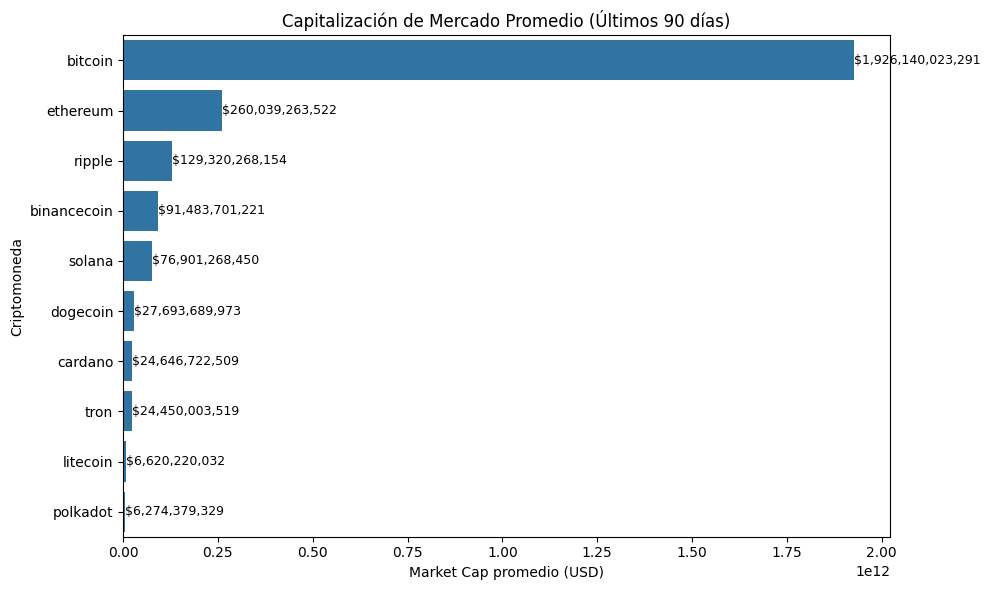

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'date' sea datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Filtrar los últimos 90 días disponibles
fecha_max = df_merged["date"].max()
fecha_min = fecha_max - pd.Timedelta(days=90)
df_ultimos_90 = df_merged[df_merged["date"] >= fecha_min]

# Calcular promedio de market cap por cripto
promedios_marketcap = (
    df_ultimos_90.groupby("id")["market_cap"]
    .mean()
    .sort_values(ascending=False)  # Orden ascendente para que las barras más grandes queden arriba
)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(
    x=promedios_marketcap.values,
    y=promedios_marketcap.index,
    orient="h"              # horizontal
)
plt.title("Capitalización de Mercado Promedio (Últimos 90 días)")
plt.xlabel("Market Cap promedio (USD)")
plt.ylabel("Criptomoneda")

for i, v in enumerate(promedios_marketcap.values):
    plt.text(v, i, f"${v:,.0f}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

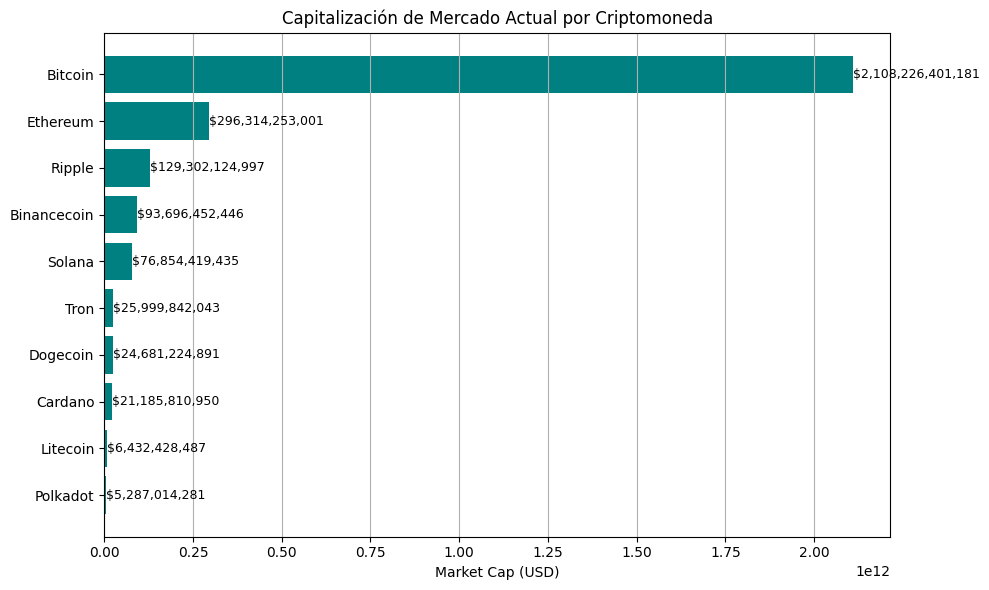

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que la fecha esté en formato datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Obtener el último valor (fecha más reciente) de market cap por cripto
latest_market_caps = (
    df_merged.sort_values("date")
    .groupby("id")
    .tail(1)[["id", "market_cap"]]
    .set_index("id")
    .sort_values("market_cap", ascending=True)
)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(latest_market_caps.index.str.capitalize(), latest_market_caps["market_cap"], color="teal")
plt.xlabel("Market Cap (USD)")
plt.title("Capitalización de Mercado Actual por Criptomoneda")
plt.grid(axis='x')

# Agregar texto con el valor numérico al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f"${width:,.0f}", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

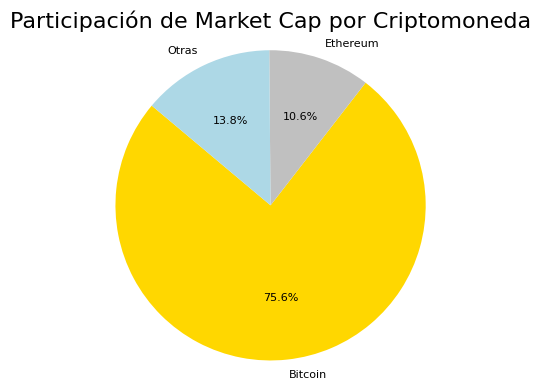

In [58]:
import matplotlib.pyplot as plt

# Tomar el último market cap disponible para cada cripto
latest_market_caps = (
    df_merged.sort_values("date")
    .groupby("id")
    .tail(1)[["id", "market_cap"]]
    .set_index("id")
    .sort_values("market_cap", ascending=False)
)

# Extraer valores individuales
bitcoin_cap = latest_market_caps.loc["bitcoin", "market_cap"]
ethereum_cap = latest_market_caps.loc["ethereum", "market_cap"]
other_caps = latest_market_caps.drop(["bitcoin", "ethereum"]).sum().values[0]

# Preparar datos para el gráfico
labels = ["Bitcoin", "Ethereum", "Otras"]
values = [bitcoin_cap, ethereum_cap, other_caps]
colors = ["gold", "silver", "lightblue"]

# Crear gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors, textprops={'fontsize': 8})
plt.title("Participación de Market Cap por Criptomoneda", fontsize=16)
plt.axis("equal")  # Para mantener forma circular
plt.tight_layout()
plt.show()

El gráfico muestra claramente el **dominio de Bitcoin en el mercado cripto**, representando el 74,5% de la capitalización total entre las criptomonedas analizadas. Le sigue Ethereum con un 11,2%, mientras que el resto de las 8 criptomonedas combinadas apenas alcanza un 14,3%.
Esto destaca la alta concentración del valor de mercado en un pequeño número de activos, lo que puede tener implicancias clave para decisiones de inversión y análisis de riesgo.


## 📌 Pregunta de Interés n° 2:

**¿Cuál ha sido el comportamiento del precio de las principales criptomonedas en el tiempo?** ❓

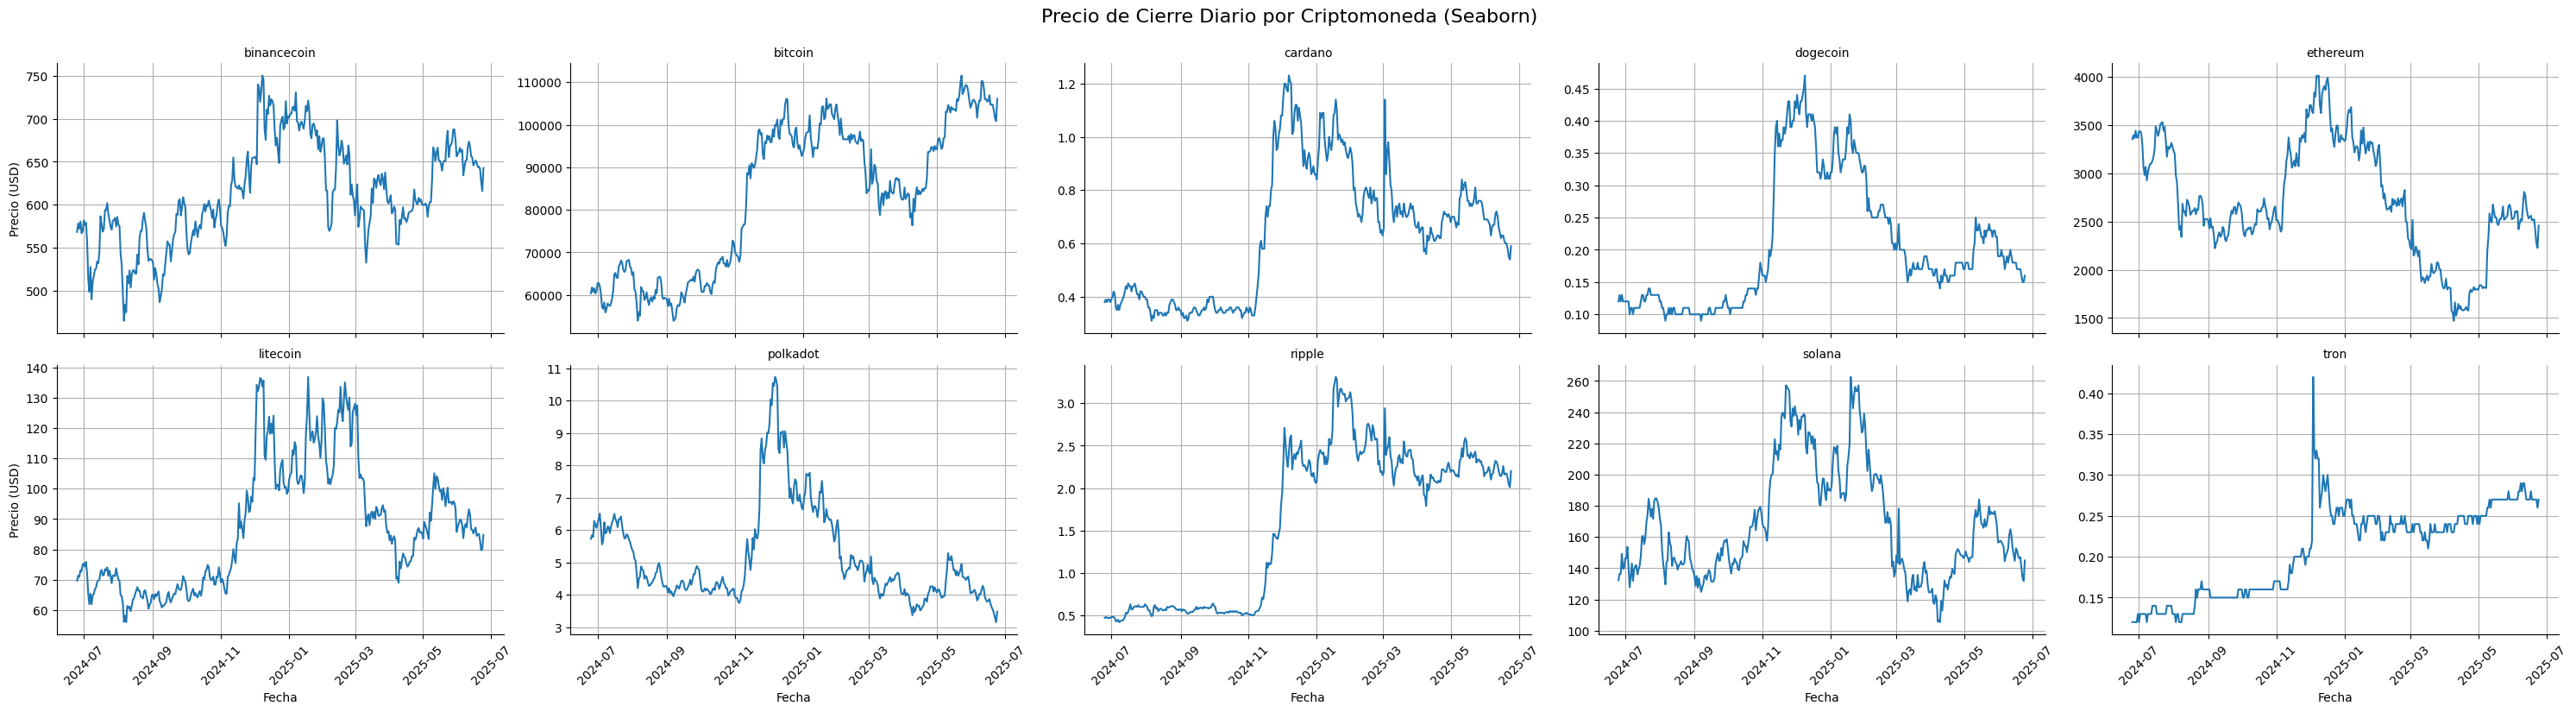

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de líneas por criptomoneda
g = sns.FacetGrid(df_merged, col="id", col_wrap=5, height=4, aspect=1.5, sharey=False)

# Dibujar línea del precio de cierre
g.map(sns.lineplot, "date", "closing_price")

# Ajustar títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Fecha", "Precio (USD)")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.grid(True)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Precio de Cierre Diario por Criptomoneda (Seaborn)", fontsize=16)
plt.show()

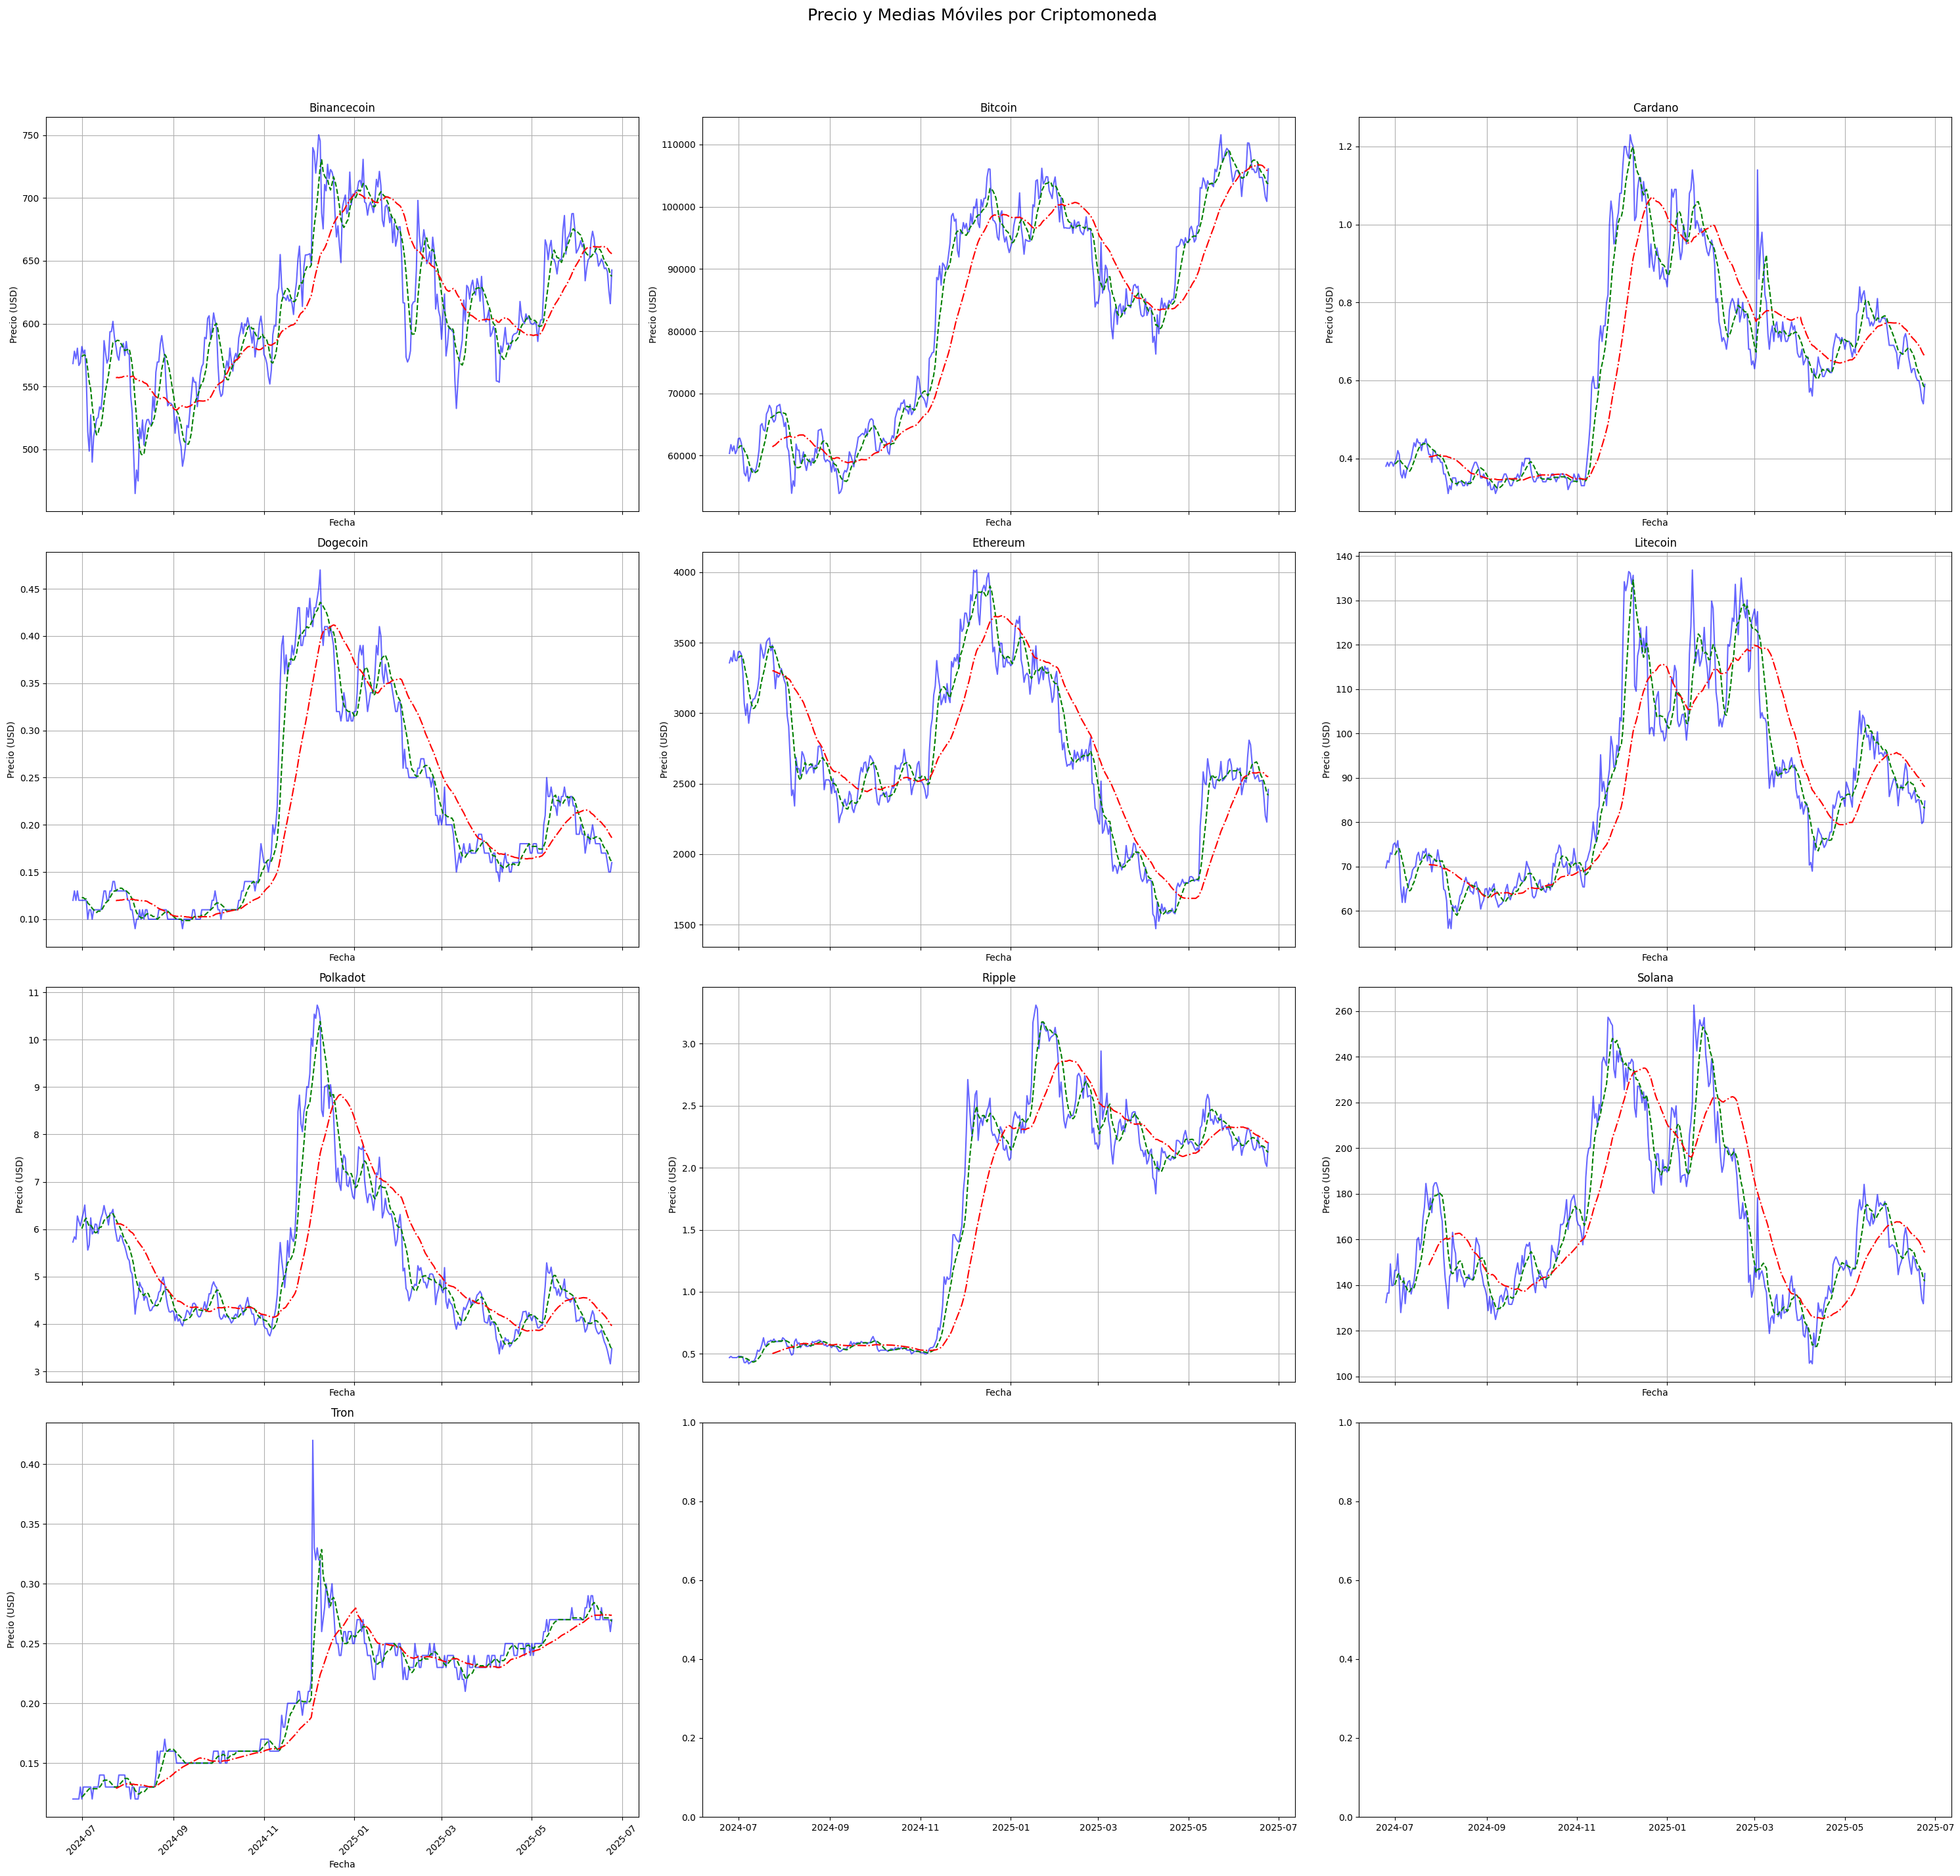

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de criptomonedas
cryptos = df_merged["id"].unique()

# Crear figura y subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30, 30), sharex=True)
axs = axs.flatten()

for i, crypto in enumerate(cryptos):
    ax = axs[i]

    # Filtrar la cripto
    df_crypto = df_merged[df_merged["id"] == crypto]

    # Graficar líneas
    ax.plot(df_crypto["date"], df_crypto["closing_price"], label="Precio", color="blue", alpha=0.6)
    ax.plot(df_crypto["date"], df_crypto["sma_7"], label="SMA 7 días", linestyle="--", color="green")
    ax.plot(df_crypto["date"], df_crypto["sma_30"], label="SMA 30 días", linestyle="-.", color="red")

    # Estética
    ax.set_title(crypto.capitalize())
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio (USD)")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True)

# Título general
fig.suptitle("Precio y Medias Móviles por Criptomoneda", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.show()

In [61]:
from datetime import timedelta

# Asegurar que 'date' esté ordenado y en formato datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])
fecha_max = df_merged["date"].max()
fecha_365 = fecha_max - timedelta(days=365)

# Lista de resultados
resumen = []

for cripto in df_merged["id"].unique():
    df_c = df_merged[df_merged["id"] == cripto].sort_values("date")

    # Precio más cercano a hace 365 días
    precio_365_row = df_c.iloc[(df_c["date"] - fecha_365).abs().argsort().iloc[0]]
    precio_365 = precio_365_row["closing_price"]
    fecha_365_real = precio_365_row["date"].date()

    # Precio más reciente
    precio_actual_row = df_c[df_c["date"] == df_c["date"].max()].iloc[0]
    precio_actual = precio_actual_row["closing_price"]
    fecha_actual = precio_actual_row["date"].date()

    # Variación porcentual
    variacion_pct = ((precio_actual - precio_365) / precio_365) * 100

    resumen.append({
        "Criptomoneda": cripto.capitalize(),
        "Fecha anterior": fecha_365_real,
        "Precio anterior (USD)": round(precio_365, 2),
        "Fecha Actual": fecha_actual,
        "Precio Actual (USD)": round(precio_actual, 2),
        "Variación %": round(variacion_pct, 2)
    })

# Crear DataFrame
df_resumen_365 = pd.DataFrame(resumen)

# Ordenar por variación
df_resumen_365 = df_resumen_365.sort_values(by="Variación %", ascending=False)
display(df_resumen_365)

,Criptomoneda,Fecha anterior,Precio anterior (USD),Fecha Actual,Precio Actual (USD),Variación %
7,Ripple,2024-06-25,0.47,2025-06-24,2.20,368.09
9,Tron,2024-06-25,0.12,2025-06-24,0.27,125.00
1,Bitcoin,2024-06-25,"60,363.23",2025-06-24,"106,085.00",75.74
2,Cardano,2024-06-25,0.38,2025-06-24,0.59,55.26
3,Dogecoin,2024-06-25,0.12,2025-06-24,0.16,33.33
5,Litecoin,2024-06-25,69.72,2025-06-24,84.77,21.59
0,Binancecoin,2024-06-25,568.29,2025-06-24,642.67,13.09
8,Solana,2024-06-25,132.34,2025-06-24,145.01,9.57
4,Ethereum,2024-06-25,"3,357.10",2025-06-24,"2,458.79",-26.76
6,Polkadot,2024-06-25,5.73,2025-06-24,3.48,-39.27


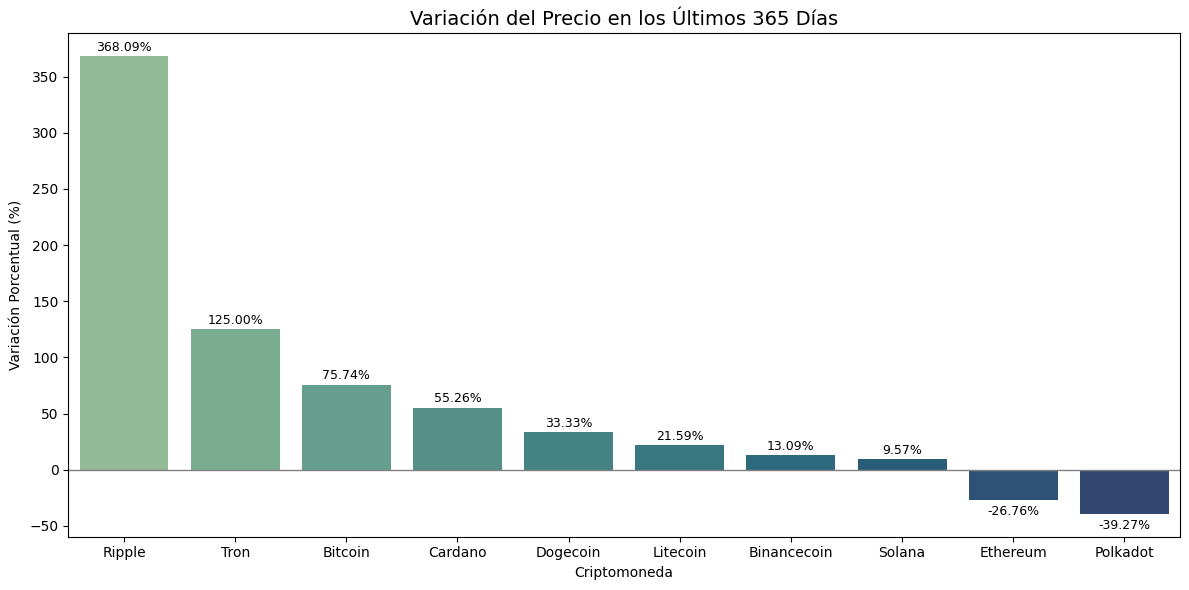

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear paleta de colores suaves (verde si es positivo, rojo si es negativo)
colores = ["lightgreen" if x > 0 else "lightcoral" for x in df_resumen_365["Variación %"]]

plt.figure(figsize=(12, 6))

# Graficar sin palette
ax = sns.barplot(
    x="Criptomoneda",
    y="Variación %",
    data=df_resumen_365,
    hue="Criptomoneda",
    palette="crest", legend=False
)

# Línea horizontal en el 0%
plt.axhline(0, color="gray", linewidth=1)

# Títulos y etiquetas
plt.title("Variación del Precio en los Últimos 365 Días", fontsize=14)
plt.ylabel("Variación Porcentual (%)")
plt.xlabel("Criptomoneda")

# Mostrar valor numérico encima o debajo de cada barra
for i, v in enumerate(df_resumen_365["Variación %"]):
    plt.text(i, v + (2 if v > 0 else -5), f"{v:.2f}%",
             ha='center', va='bottom' if v > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

Durante el último año, la mayoría de las criptomonedas analizadas experimentaron aumentos en sus precios, destacándose Ripple (+325%) y Tron (+145%) con crecimientos sobresalientes. Bitcoin también mostró una fuerte revalorización (+54%), consolidando su posición como referente del mercado. Sin embargo, no todas las criptomonedas tuvieron un desempeño positivo: Polkadot y Ethereum registraron caídas del -40% y -30% respectivamente, lo que resalta la alta heterogeneidad en el comportamiento de los criptoactivos.

## 📌 Pregunta de Interés n° 3:

**¿Existen criptomonedas que evolucionan de forma similar (positiva o negativa) a lo largo del tiempo?** ❓

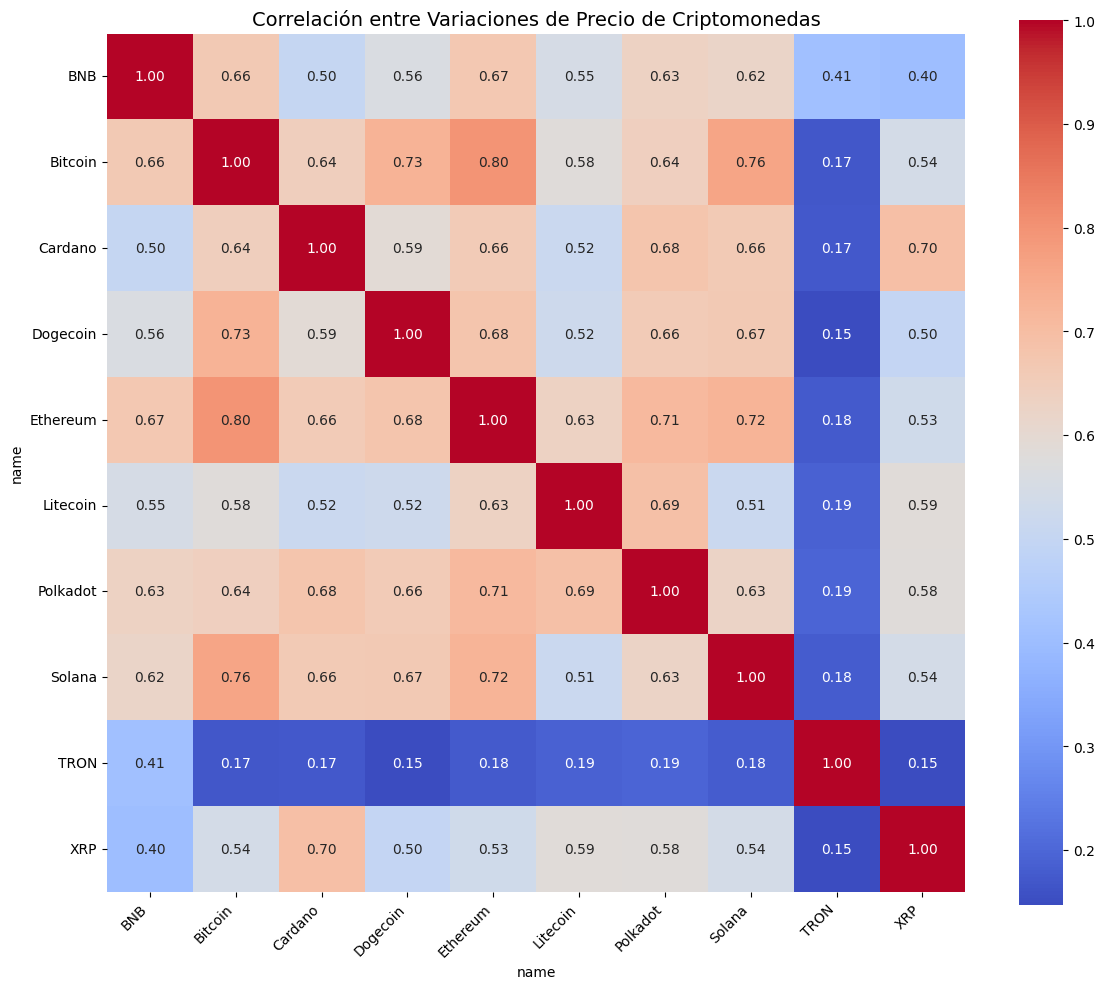

Pares de criptomonedas con alta correlación (> 0.7):
name      name    
Bitcoin   Ethereum   0.80
Solana    Bitcoin    0.76
Bitcoin   Dogecoin   0.73
Solana    Ethereum   0.72
Ethereum  Polkadot   0.71
dtype: float64


In [ ]:
# Asegurarnos de que esté ordenado por fecha
df_merged = df_merged.sort_values(by="date")

# Crear tabla pivot con fechas como índice y criptomonedas como columnas
prices_df = df_merged.pivot(index="date", columns="name", values="closing_price")

# Calcular variaciones porcentuales diarias
returns_df = prices_df.pct_change().dropna()

# Calcular la correlación entre las series de retornos diarios
corr_matrix = returns_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlación entre Variaciones de Precio de Criptomonedas", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Desarmar la matriz en pares y filtrar los más correlacionados (sin duplicados ni diagonales)
corr_pairs = corr_matrix.unstack()
high_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.7)].sort_values(ascending=False).drop_duplicates()

print("Pares de criptomonedas con alta correlación (> 0.7):")
print(high_corr)

El análisis de correlación revela que existen fuertes relaciones entre ciertos pares de criptomonedas, lo que sugiere que tienden a moverse de manera similar. En particular, Bitcoin y Ethereum presentan la mayor correlación (0.80), seguidos por otros pares como Solana–Bitcoin y Ethereum–Polkadot. Este comportamiento puede ser útil para estrategias de diversificación o cobertura, ya que indica qué activos suelen responder de forma alineada ante cambios del mercado.

## 📌 Pregunta de Interés n° 4:

**¿Cuál es la relación entre el volumen de operaciones y el precio diario?** ❓

In [ ]:
# Crear una lista de criptomonedas únicas
criptos = df_merged["name"].unique()

# Calcular correlación entre precio y volumen para cada cripto
correlaciones = []
for cripto in criptos:
    df_c = df_merged[df_merged["name"] == cripto]
    corr = df_c["closing_price"].corr(df_c["total_volume_day"])
    correlaciones.append((cripto, corr))

# Convertir a DataFrame
df_corr = pd.DataFrame(correlaciones, columns=["Criptomoneda", "Correlación"])

# Ordenar de mayor a menor
df_corr = df_corr.sort_values("Correlación", ascending=False)

# Mostrar tabla
df_corr

,Criptomoneda,Correlación
2,Litecoin,0.68
5,Dogecoin,0.63
1,Polkadot,0.62
7,Cardano,0.61
3,Solana,0.55
6,TRON,0.51
9,XRP,0.47
8,Bitcoin,0.32
0,BNB,0.31
4,Ethereum,0.27


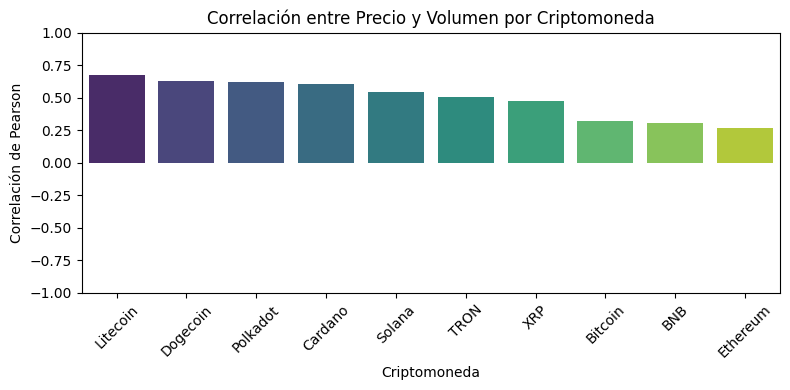

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(
    x="Criptomoneda",
    y="Correlación",
    hue="Criptomoneda",  # necesario para poder usar palette
    data=df_corr,
    palette="viridis",
    legend=False  # ocultamos la leyenda porque está en el eje X
)
plt.xticks(rotation=45)
plt.title("Correlación entre Precio y Volumen por Criptomoneda")
plt.ylabel("Correlación de Pearson")
plt.xlabel("Criptomoneda")
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

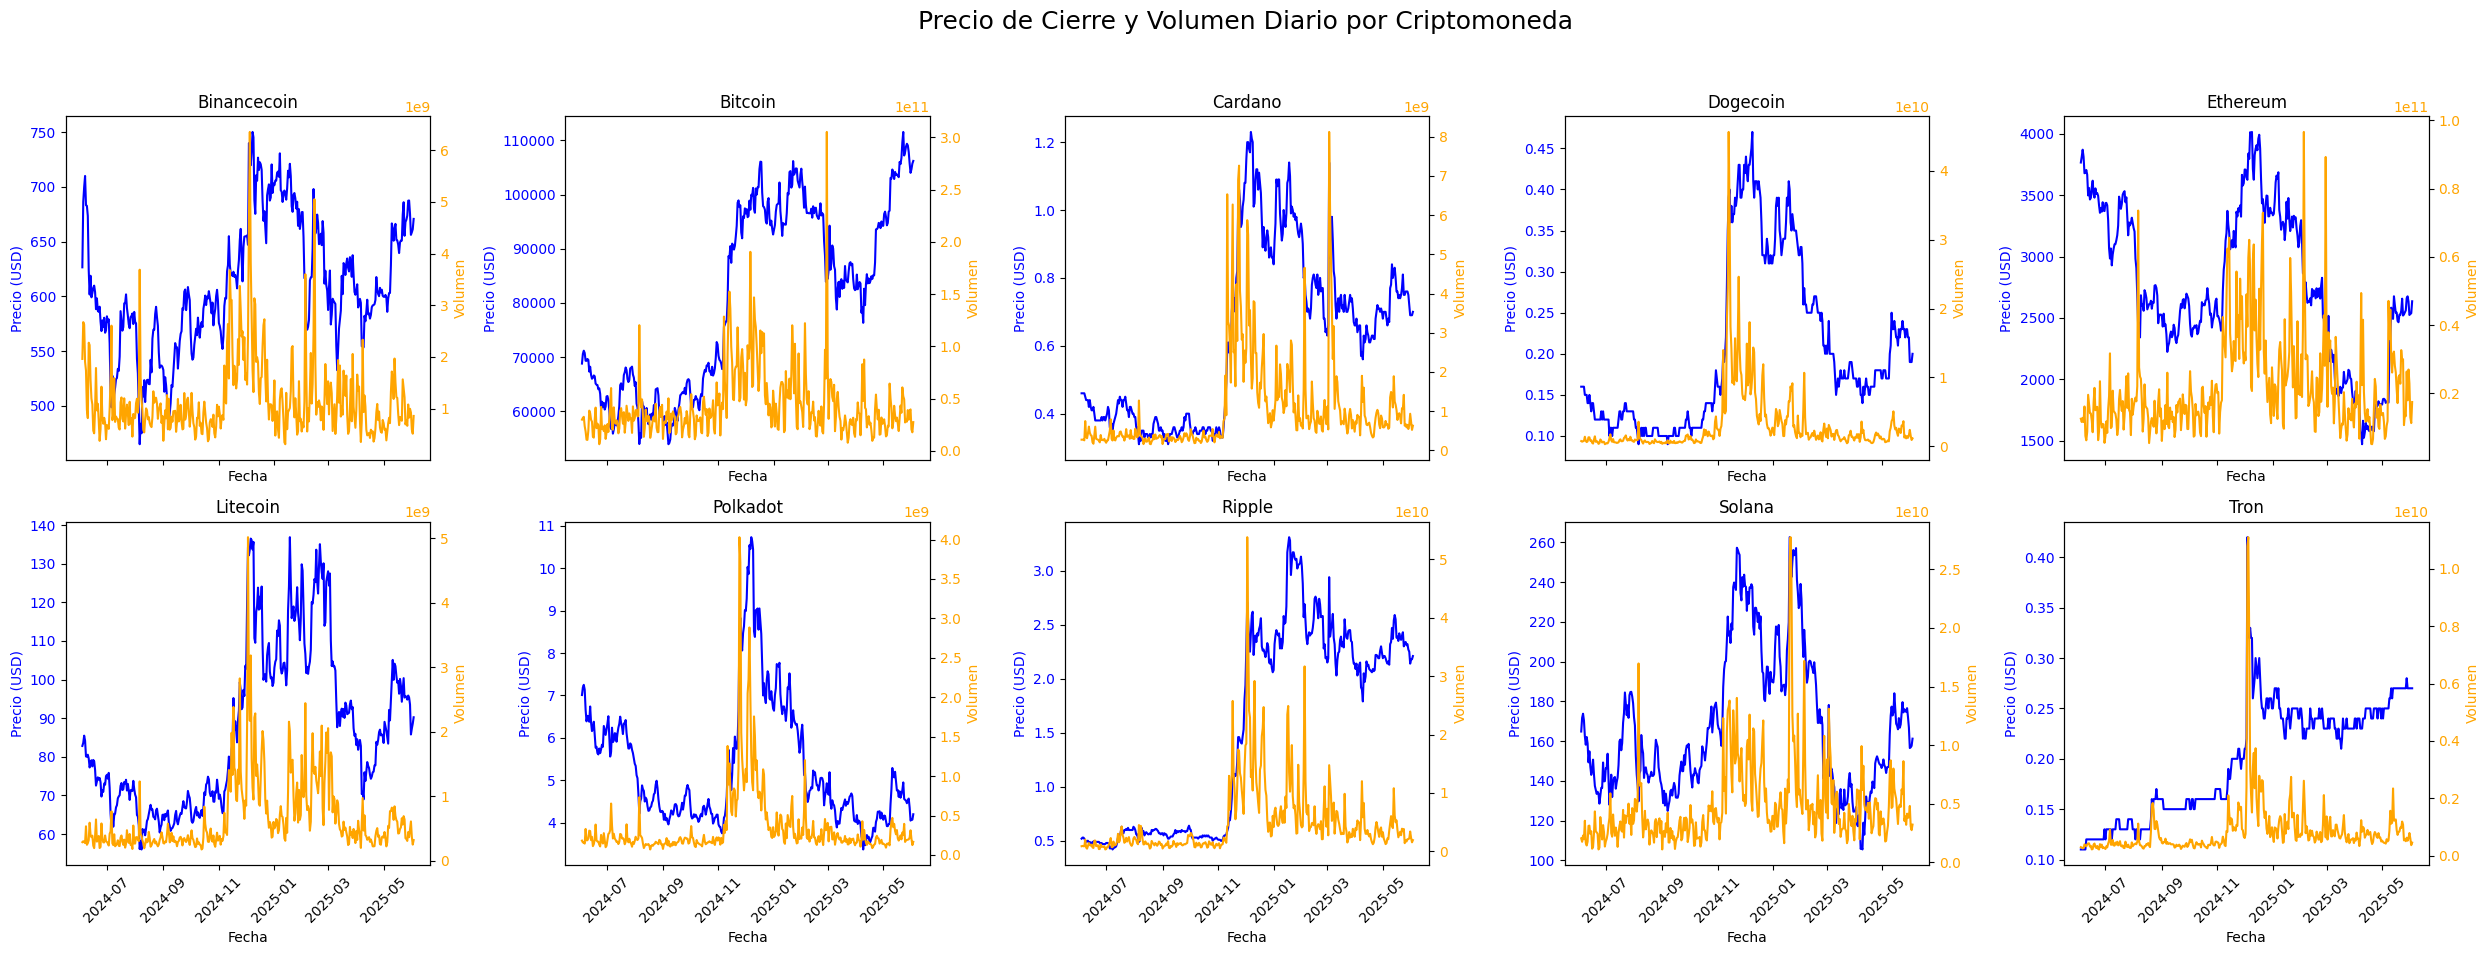

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar tipo datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Lista de criptomonedas
cryptos = df_merged["id"].unique()

# Crear subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10), sharex=True)
axs = axs.flatten()

for i, crypto in enumerate(cryptos):
    ax = axs[i]

    # Filtrar la cripto
    df_crypto = df_merged[df_merged["id"] == crypto]

    # Primer eje: precio de cierre
    ax.plot(df_crypto["date"], df_crypto["closing_price"], color="blue", label="Precio de Cierre")
    ax.set_title(crypto.capitalize())
    ax.set_ylabel("Precio (USD)", color="blue")
    ax.tick_params(axis='y', labelcolor="blue")

    # Segundo eje: volumen total diario
    ax2 = ax.twinx()
    ax2.plot(df_crypto["date"], df_crypto["total_volume_day"], color="orange", label="Volumen Diario")
    ax2.set_ylabel("Volumen", color="orange")
    ax2.tick_params(axis='y', labelcolor="orange")

    # Rotar fechas
    ax.set_xlabel("Fecha")
    ax.tick_params(axis="x", rotation=45)

# Título general
fig.suptitle("Precio de Cierre y Volumen Diario por Criptomoneda", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

El análisis revela que algunas criptomonedas, como Litecoin, Dogecoin y Polkadot, presentan una alta correlación entre el precio de cierre y el volumen negociado. Esto sugiere que, en estos casos, aumentos en el volumen de operaciones suelen estar acompañados por movimientos en el precio, lo cual podría indicar un mercado más reactivo o influenciado por el interés de los inversores. Por otro lado, criptomonedas como Bitcoin y Ethereum muestran una correlación baja, lo que puede señalar que su precio responde a otros factores, como noticias globales o cambios regulatorios, más que al volumen transado.

## 📌 Pregunta de Interés n° 5:

**¿Qué tan volátil ha sido cada criptomoneda en el periodo analizado?** ❓

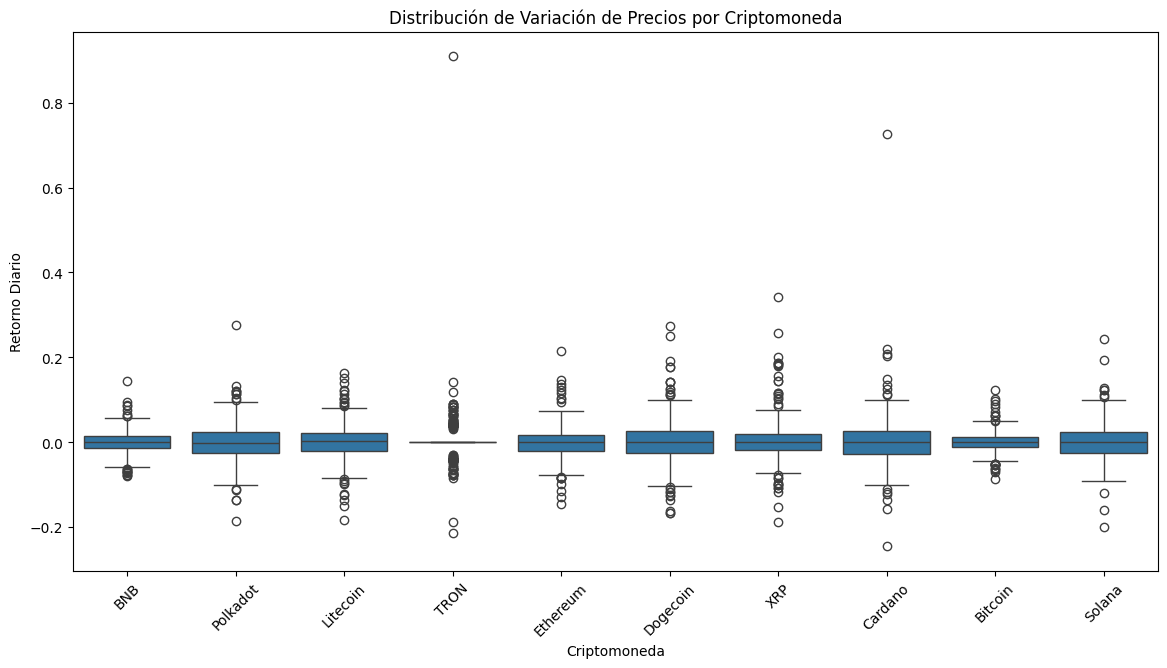

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(x="name", y="daily_return", data=df_merged)
plt.xticks(rotation=45)
plt.title("Distribución de Variación de Precios por Criptomoneda")
plt.ylabel("Retorno Diario")
plt.xlabel("Criptomoneda")
plt.show()

In [ ]:
df_merged["daily_return"] = df_merged.groupby("name")["closing_price"].pct_change()

In [ ]:
# Desviación estándar de los retornos diarios
df_volatilidad = df_merged.groupby("name")["daily_return"].std().reset_index()
df_volatilidad.columns = ["Criptomoneda", "Volatilidad"]
df_volatilidad = df_volatilidad.sort_values("Volatilidad", ascending=False)

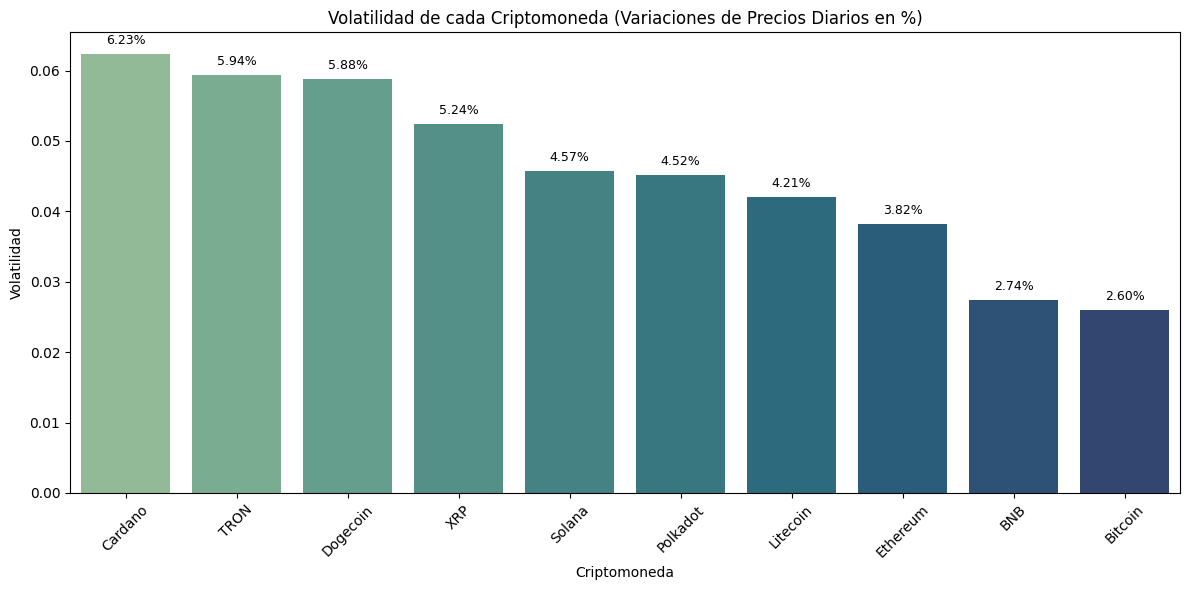

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_volatilidad, x="Criptomoneda", y="Volatilidad", hue="Criptomoneda", palette="crest", legend=False)

# Mostrar valores en porcentaje encima de cada barra
for i, v in enumerate(df_volatilidad["Volatilidad"]):
    plt.text(i, v + 0.001, f"{v * 100:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Volatilidad de cada Criptomoneda (Variaciones de Precios Diarios en %)")
plt.ylabel("Volatilidad")
plt.xlabel("Criptomoneda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las criptomonedas se caracterizan por una alta volatilidad, es decir, presentan fuertes fluctuaciones en sus precios diarios. Esta inestabilidad puede representar riesgos significativos, pero también oportunidades de ganancias para inversores con alta tolerancia al riesgo.
En nuestro análisis, se observaron diferencias importantes entre activos, siendo las criptomonedas con menor capitalización las que muestran mayores niveles de volatilidad.


## 📌 Pregunta de Interés n° 6:

**¿Cómo se comporta el precio de una criptomoneda frente a movimientos bruscos en otra?** ❓ *En este caso llamamos "otra" a BITCOIN.

In [ ]:
import pandas as pd

# Filtrar días con movimientos bruscos en BTC (ya calculados antes)
umbral = 0.05
df_btc = df_merged[df_merged["name"] == "Bitcoin"][["date", "daily_return"]].rename(columns={"daily_return": "btc_return"})
dias_bruscos = df_btc[abs(df_btc["btc_return"]) >= umbral].copy()  # <-- copia explícita para evitar warning

# Crear columna para indicar si es subida o bajada
dias_bruscos["movimiento_signo"] = dias_bruscos["btc_return"].apply(lambda x: "Subida" if x > 0 else "Bajada")

# Obtener datos de otras criptos en esos días
df_otros = df_merged[df_merged["name"] != "Bitcoin"]
df_otros_bruscos = df_otros[df_otros["date"].isin(dias_bruscos["date"])]

# Unir signo de movimiento BTC para agrupación
df_otros_bruscos = df_otros_bruscos.merge(dias_bruscos[["date", "movimiento_signo"]], on="date")

# Agrupar y calcular estadísticas
tabla_resumen = df_otros_bruscos.groupby(["name", "movimiento_signo"])["daily_return"].agg(
    promedio="mean",

).reset_index()

# Mostrar tabla ordenada
tabla_resumen = tabla_resumen.sort_values(by=["name", "movimiento_signo"], ascending=[True, False])

tabla_resumen

,name,movimiento_signo,promedio
1,BNB,Subida,0.04
0,BNB,Bajada,-0.05
3,Cardano,Subida,0.14
2,Cardano,Bajada,-0.10
5,Dogecoin,Subida,0.14
4,Dogecoin,Bajada,-0.11
7,Ethereum,Subida,0.10
6,Ethereum,Bajada,-0.08
9,Litecoin,Subida,0.06
8,Litecoin,Bajada,-0.08


El análisis muestra cómo reaccionan distintas criptomonedas ante subidas o bajadas en el precio de Bitcoin. En general, la mayoría tiende a subir cuando Bitcoin sube y a bajar cuando este desciende, aunque con distintas intensidades. Por ejemplo, Cardano y Dogecoin muestran respuestas más marcadas, mientras que TRON o BNB presentan variaciones más leves. Estos patrones pueden ser útiles para anticipar movimientos en el mercado cripto a partir del comportamiento de Bitcoin.

## 📌 Pregunta de Interés n° 7:

**¿Qué criptomonedas muestran una recuperación más rápida tras caídas significativas?** ❓

In [ ]:
import pandas as pd
import numpy as np

# Definir umbral de caída significativa (ejemplo -5%)
umbral_caida = -0.05

resultados = []

criptos = df_merged['name'].unique()

for cripto in criptos:
    df_c = df_merged[df_merged['name'] == cripto].sort_values('date').reset_index(drop=True)
    precios = df_c['closing_price']
    retornos = df_c['daily_return']

    # Encontrar índices con caídas significativas
    caidas_idx = retornos[retornos <= umbral_caida].index

    recuperaciones = []
    for idx in caidas_idx:
        precio_previo = precios[idx - 1] if idx > 0 else precios[idx]
        # Buscar el primer día después de la caída donde el precio >= precio_previo
        recuperacion_idx = None
        for i in range(idx + 1, len(precios)):
            if precios[i] >= precio_previo:
                recuperacion_idx = i
                break
        if recuperacion_idx is not None:
            dias_recuperacion = recuperacion_idx - idx
            recuperaciones.append(dias_recuperacion)

    if recuperaciones:
        promedio_recuperacion = np.mean(recuperaciones)
    else:
        promedio_recuperacion = np.nan  # No hubo recuperaciones

    resultados.append({'Criptomoneda': cripto, 'Días promedio recuperación': promedio_recuperacion})

df_recuperacion = pd.DataFrame(resultados).sort_values('Días promedio recuperación')

df_recuperacion

,Criptomoneda,Días promedio recuperación
9,XRP,12.86
7,Cardano,14.03
3,Solana,16.03
5,Dogecoin,17.07
8,Bitcoin,23.67
6,TRON,25.29
2,Litecoin,25.48
0,BNB,27.62
4,Ethereum,28.26
1,Polkadot,31.80


El análisis muestra diferencias significativas en el tiempo promedio que tardan las criptomonedas en recuperarse luego de caídas importantes. Aquí es importante destacar que denominamos **"caída significativa" a una reducción de al menos un 5% del valor de la cripto**.
XRP, Cardano y Solana destacan como las más rápidas en recuperar valor, con promedios inferiores a 17 días. En contraste, Ethereum, Polkadot y BNB presentan recuperaciones más lentas, superando los 27 días.
Este comportamiento puede ser clave para evaluar estrategias de inversión a corto plazo y la resiliencia de cada activo ante eventos de alta volatilidad.


##💡 **Hipótesis**

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# 1. Calcular capitalización de mercado promedio por criptomoneda
avg_market_cap = df_merged.groupby("name")["market_cap"].mean().sort_values(ascending=False)

# 2. Seleccionar Top 5 y Bottom 5
top_5 = avg_market_cap.head(5).index.tolist()
bottom_5 = avg_market_cap.tail(5).index.tolist()

# 3. Calcular retornos diarios si aún no están calculados
df_merged = df_merged.sort_values(["name", "date"])
df_merged["daily_return"] = df_merged.groupby("name")["closing_price"].pct_change()

# 4. Filtrar datos por grupos
df_top5 = df_merged[df_merged["name"].isin(top_5)]
df_bottom5 = df_merged[df_merged["name"].isin(bottom_5)]

# 5. Calcular volatilidad (desviación estándar) por criptomoneda
vol_top5 = df_top5.groupby("name")["daily_return"].std()
vol_bottom5 = df_bottom5.groupby("name")["daily_return"].std()

# 6. Test t para comparar medias de volatilidad
t_stat, p_valor = ttest_ind(vol_top5, vol_bottom5, equal_var=False)

# 7. Mostrar resultados
print("📊 Resultado del test t:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-valor: {p_valor:.4f}")

# 8. Crear tabla resumen
resumen = pd.DataFrame({
    "Grupo": ["Top 5"] * 5 + ["Bottom 5"] * 5,
    "Criptomoneda": top_5 + bottom_5,
    "Volatilidad Promedio (%)": list(vol_top5 * 100) + list(vol_bottom5 * 100)
})

print("\n📋 Tabla resumen de volatilidades:")
print(resumen)


📊 Resultado del test t:
T-statistic: -2.373
P-valor: 0.0464

📋 Tabla resumen de volatilidades:
      Grupo Criptomoneda  Volatilidad Promedio (%)
0     Top 5      Bitcoin                      2.74
1     Top 5     Ethereum                      2.60
2     Top 5          BNB                      3.82
3     Top 5          XRP                      4.57
4     Top 5       Solana                      5.24
5  Bottom 5     Dogecoin                      6.23
6  Bottom 5      Cardano                      5.88
7  Bottom 5         TRON                      4.21
8  Bottom 5     Polkadot                      4.52
9  Bottom 5     Litecoin                      5.94


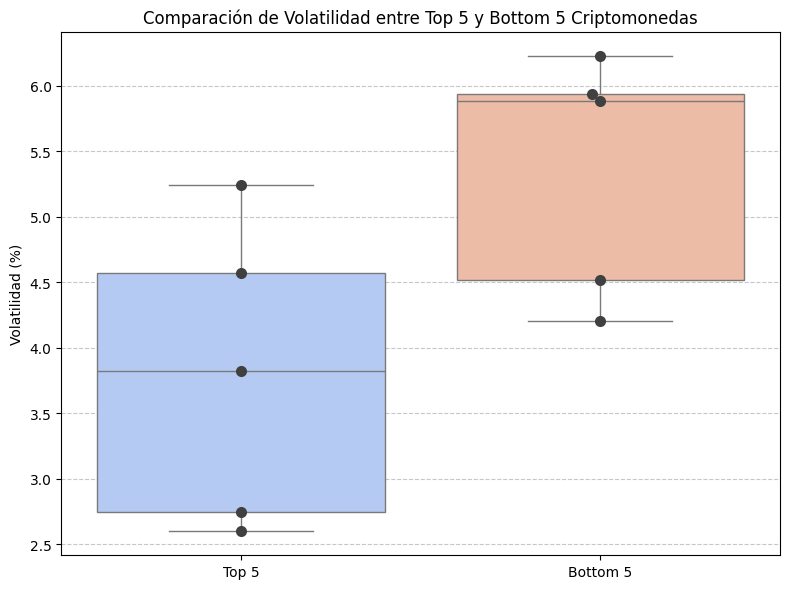

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Primero definimos las listas de top 5 y bottom 5 según market_cap_rank
top_5 = df_merged.groupby("name")["market_cap_rank"].mean().sort_values().head(5).index.tolist()
bottom_5 = df_merged.groupby("name")["market_cap_rank"].mean().sort_values(ascending=False).head(5).index.tolist()

# Función para calcular volatilidad como std de retornos diarios * 100 (%)
def calcular_volatilidad(df, cripto):
    df_c = df[df["name"] == cripto]
    df_c = df_c.copy()
    df_c["daily_return"] = df_c["closing_price"].pct_change()
    return df_c["daily_return"].std() * 100

# Calcular volatilidad para top 5 y bottom 5
vol_top_5 = {cripto: calcular_volatilidad(df_merged, cripto) for cripto in top_5}
vol_bottom_5 = {cripto: calcular_volatilidad(df_merged, cripto) for cripto in bottom_5}

# Crear DataFrame para el gráfico
df_volatilidad = pd.DataFrame({
    "Criptomoneda": top_5 + bottom_5,
    "Volatilidad (%)": [vol_top_5[c] for c in top_5] + [vol_bottom_5[c] for c in bottom_5],
    "Grupo": ["Top 5"] * 5 + ["Bottom 5"] * 5
})

# Gráfico boxplot con puntos individuales
plt.figure(figsize=(8, 6))
sns.boxplot(x="Grupo", y="Volatilidad (%)", data=df_volatilidad, hue="Grupo", palette="coolwarm", legend=False)
sns.swarmplot(x="Grupo", y="Volatilidad (%)", data=df_volatilidad, color=".25", size=8)

plt.title("Comparación de Volatilidad entre Top 5 y Bottom 5 Criptomonedas")
plt.ylabel("Volatilidad (%)")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


✅ **Conclusión:**

**Los resultados del análisis muestran que las criptomonedas con mayor capitalización de mercado (Top 5) presentan una volatilidad significativamente menor en comparación con aquellas con menor capitalización (Bottom 5)**.
El test t realizado arrojó un valor de T = -2.373 y un p-valor = 0.0464, lo que permite rechazar la hipótesis nula y aceptar la hipótesis alternativa con un nivel de confianza del 95%.
Esto respalda la idea de que, en el período analizado, **las criptomonedas más consolidadas tienden a mostrar un comportamiento de precios más estable**.